In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import colors
from matplotlib.colors import LogNorm
import matplotlib as mpl 
mpl.rcParams["image.origin"] = 'lower'
# mpl.rcParams["image.dpi"] = 200
import os
import numpy as np
import pandas as pd

import mplhep as hep
plt.style.use(hep.style.CMS)
from plotting_utils import *

In [2]:
input_folder = "/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/reco_comparison/reco_regression_pfthresholds_studies/electrons_genmatching"
output_folder = "/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/RecoPlots/RecoComparison_noise235fb_34sigmathresh_v1/electrons/gen_matching"
os.makedirs(output_folder, exist_ok=True)

In [3]:
df_1 = pd.HDFStore(f"{input_folder}/DeepSC_algoA_235noise_34sigma_v8.h5py", "r")["df"]
df_2 = pd.HDFStore(f"{input_folder}/Mustache_235noise_34sigma_v8.h5py", "r")["df"]
df_1.rename(columns={"output_object.csv":"genpart_index"}, inplace=True)
df_2.rename(columns={"output_object.csv":"genpart_index"}, inplace=True)
df_1 = df_1.iloc[:-1]
df_2 = df_2.iloc[:-1]

In [4]:
dfj = df_1.merge(df_2, on=["runId","eventId","genpart_index"], suffixes=["_D", "_M"],indicator=True, how="inner", sort=False)

In [97]:
df_1[(df_1.runId==1097.0)&(df_1.eventId==1)&(df_1.genpart_index==0)].ele_energy

8    683.676575
Name: ele_energy, dtype: float64

In [98]:
df_2[(df_2.runId==1097.0)&(df_2.eventId==1)&(df_2.genpart_index==0)].ele_energy

1208    695.675476
Name: ele_energy, dtype: float64

In [101]:
dfj[(dfj.runId==1097.0)&(dfj.eventId==1)&(dfj.genpart_index==0)].ele_energy_M

8    695.675476
Name: ele_energy_M, dtype: float64

# SC matching

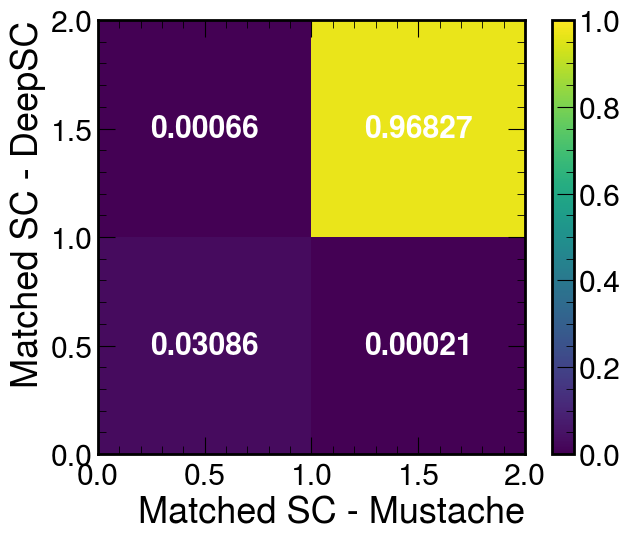

In [5]:
fig = plt.figure(figsize=(7,6))
ax = plt.gca()

hist, xbins, ybins = np.histogram2d(dfj.sc_matched_M, dfj.sc_matched_D,
                                     range=((0,2),(0,2)), bins=(2,2), density=True)

X, Y = np.meshgrid(xbins, ybins)
C = ax.pcolormesh(X,Y, hist.T, vmax=1, vmin=0)

for i in range(2):
    for j in range(2):
        ax.text(xbins[j]+0.5,ybins[i]+0.5, "{:.5f}".format(hist.T[i,j]), 
                color="w", ha="center", va="center", fontweight="bold", fontsize="small")

fig.colorbar(C,ax=ax)
ax.set_xlabel("Matched SC - Mustache")
ax.set_ylabel("Matched SC - DeepSC")
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_SC_inclusive.png")
plt.savefig(f"{output_folder}/Matched_genparticle_SC_inclusive.pdf")

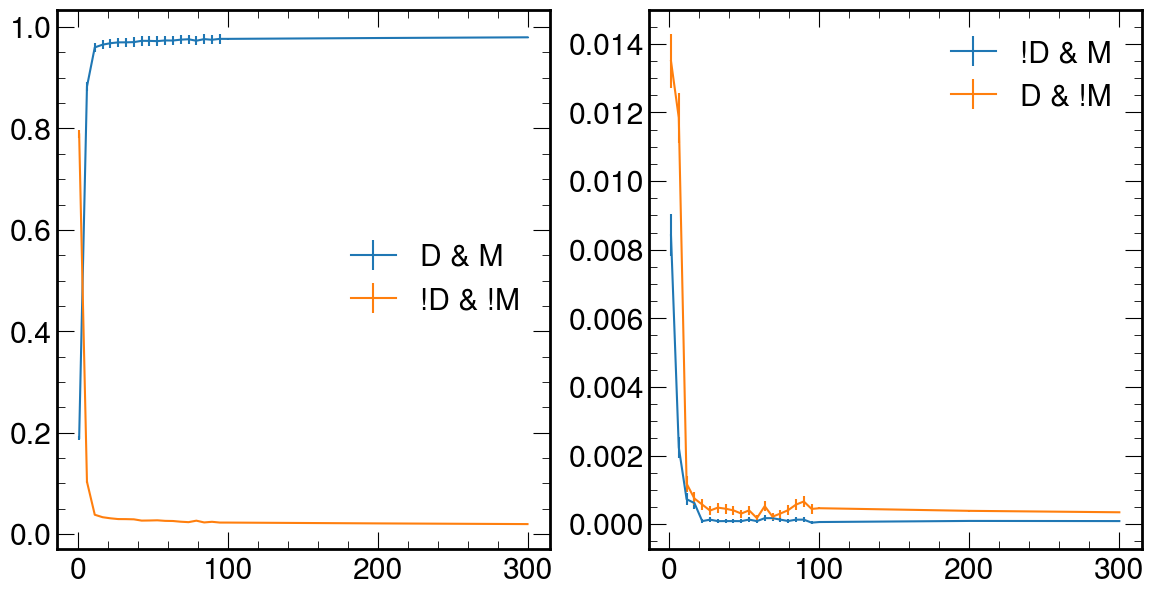

In [61]:
bins = np.concatenate([np.linspace(1, 100, 20), [200,300, 500]])

N_matched_both_pt, _ = np.histogram(dfj["genpart_pt_D"][(dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)], 
               bins=bins )

N_matched_Donly_pt, _ = np.histogram(dfj["genpart_pt_D"][(dfj.sc_matched_D==1)&(dfj.sc_matched_M==0)], 
             bins=bins )

N_matched_Monly_pt, _= np.histogram(dfj["genpart_pt_M"][(dfj.sc_matched_D==0)&(dfj.sc_matched_M==1)], 
              bins=bins )

N_notmatched_pt, xbins = np.histogram(dfj["genpart_pt_D"][(dfj.sc_matched_D==0)&(dfj.sc_matched_M==0)], 
              bins=bins )

N_tot = N_matched_both_pt + N_matched_Donly_pt + N_matched_Monly_pt + N_notmatched_pt

fig, (ax,bx) = plt.subplots(1,2, figsize=(14,7))

err_both =  np.sqrt(  (1/N_tot)**2 * N_matched_both_pt + (N_matched_both_pt/N_tot**2)**2*N_tot)
err_notmatched =  np.sqrt(  (1/N_tot)**2 * N_notmatched_pt + (N_notmatched_pt/N_tot**2)**2*N_tot)
err_Donly =  np.sqrt(  (1/N_tot)**2 * N_matched_Donly_pt + (N_matched_Donly_pt/N_tot**2)**2*N_tot)
err_Monly =  np.sqrt(  (1/N_tot)**2 * N_matched_Monly_pt + (N_matched_Monly_pt/N_tot**2)**2*N_tot)

ax.errorbar(xbins[:-1], N_matched_both_pt/N_tot, err_both, label="D & M")
ax.errorbar(xbins[:-1], N_notmatched_pt/N_tot, err_notmatched, label="!D & !M")
bx.errorbar(xbins[:-1], N_matched_Monly_pt/N_tot,err_Monly, label="!D & M")
bx.errorbar(xbins[:-1], N_matched_Donly_pt/N_tot,err_Donly, label="D & !M")

ax.legend()
bx.legend()

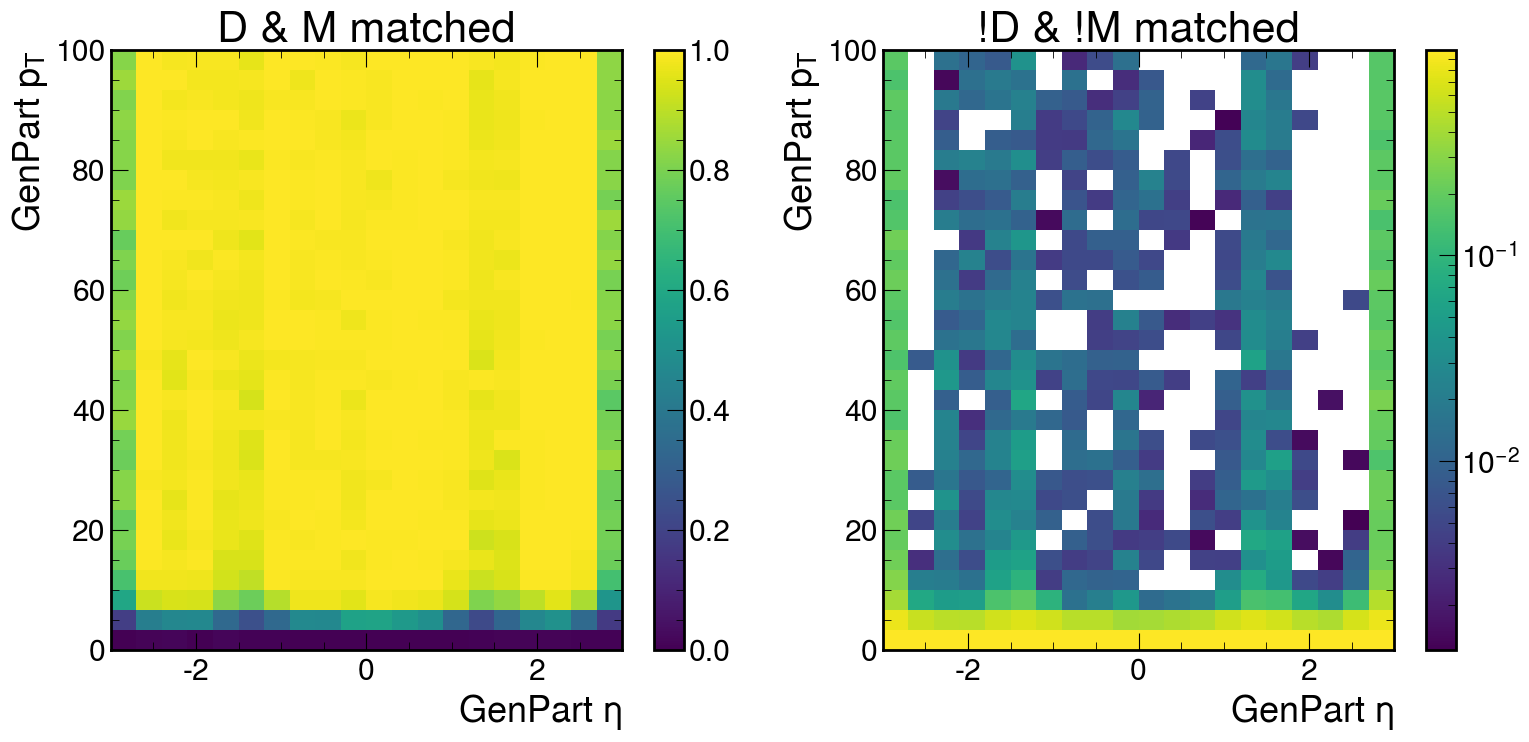

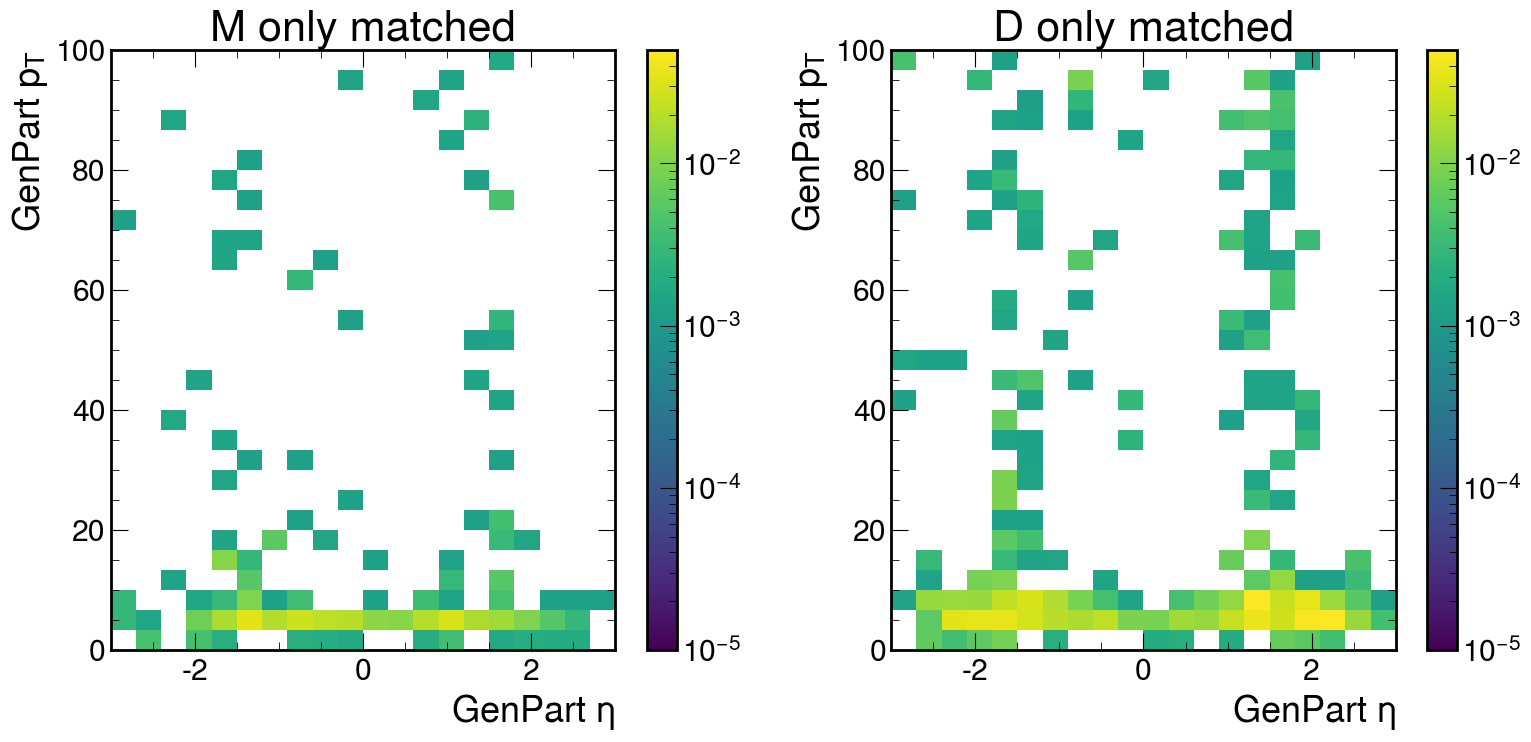

In [62]:
bins = (20, 30)
rrange = ((-3,3),(0,100))
df_join = dfj
N_matched_both_pteta, _, _ = np.histogram2d(dfj["genpart_eta_D"][(dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)],
                                            dfj["genpart_pt_D"][(dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)],
               bins=bins, range=rrange )

N_matched_Donly_pteta, _, _ = np.histogram2d(dfj["genpart_eta_D"][(df_join.sc_matched_D==1)&(df_join.sc_matched_M==0)],
                                             dfj["genpart_pt_D"][(df_join.sc_matched_D==1)&(df_join.sc_matched_M==0)],
            bins=bins, range=rrange  )

N_matched_Monly_pteta, _, _= np.histogram2d(df_join["genpart_eta_M"][(df_join.sc_matched_D==0)&(df_join.sc_matched_M==1)], 
                                            df_join["genpart_pt_M"][(df_join.sc_matched_D==0)&(df_join.sc_matched_M==1)], 
            bins=bins, range=rrange )

N_notmatched_pteta, xbins, ybins = np.histogram2d(df_join["genpart_eta_M"][(df_join.sc_matched_D==0)&(df_join.sc_matched_M==0)], 
                                                  df_join["genpart_pt_M"][(df_join.sc_matched_D==0)&(df_join.sc_matched_M==0)], 
             bins=bins, range=rrange )


N_tot = N_matched_both_pteta + N_matched_Donly_pteta + N_matched_Monly_pteta + N_notmatched_pteta

X, Y = np.meshgrid(xbins, ybins)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,8))

c1 = ax1.pcolormesh(X,Y, (N_matched_both_pteta/N_tot).T, vmax=1, vmin=0)
c2 = ax2.pcolormesh(X,Y, (N_notmatched_pteta/N_tot).T,  norm=LogNorm())

ax1.set_xlabel("GenPart $\eta$")
ax2.set_xlabel("GenPart $\eta$")
ax1.set_ylabel("GenPart $p_T$")
ax2.set_ylabel("GenPart $p_T$")
ax1.set_title("D & M matched")
ax2.set_title("!D & !M matched")
plt.colorbar(c1, ax=ax1)
plt.colorbar(c2, ax=ax2)
plt.tight_layout()

plt.savefig(f"{output_folder}/Matched_genparticle_SC_etapt_1.png")
plt.savefig(f"{output_folder}/Matched_genparticle_SC_etapt_1.pdf")

fig2, (ax3,ax4) = plt.subplots(1,2, figsize=(16,8))
c3 = ax3.pcolormesh(X,Y, (N_matched_Monly_pteta/N_tot).T,  norm=LogNorm(vmax=0.05, vmin=1e-5,))
c4 = ax4.pcolormesh(X,Y, (N_matched_Donly_pteta/N_tot).T, norm=LogNorm( vmax=0.05, vmin=1e-5,))

ax3.set_xlabel("GenPart $\eta$")
ax4.set_xlabel("GenPart $\eta$")

ax3.set_ylabel("GenPart $p_T$")
ax4.set_ylabel("GenPart $p_T$")

ax3.set_title("M only matched")
ax4.set_title("D only matched")

plt.colorbar(c3, ax=ax3)
plt.colorbar(c4, ax=ax4)
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_SC_etapt_2.png")
plt.savefig(f"{output_folder}/Matched_genparticle_SC_etapt_2.pdf")

/tmp/ipykernel_11218/1368916839.py:13: RuntimeWarning: invalid value encountered in divide
  a = A/s


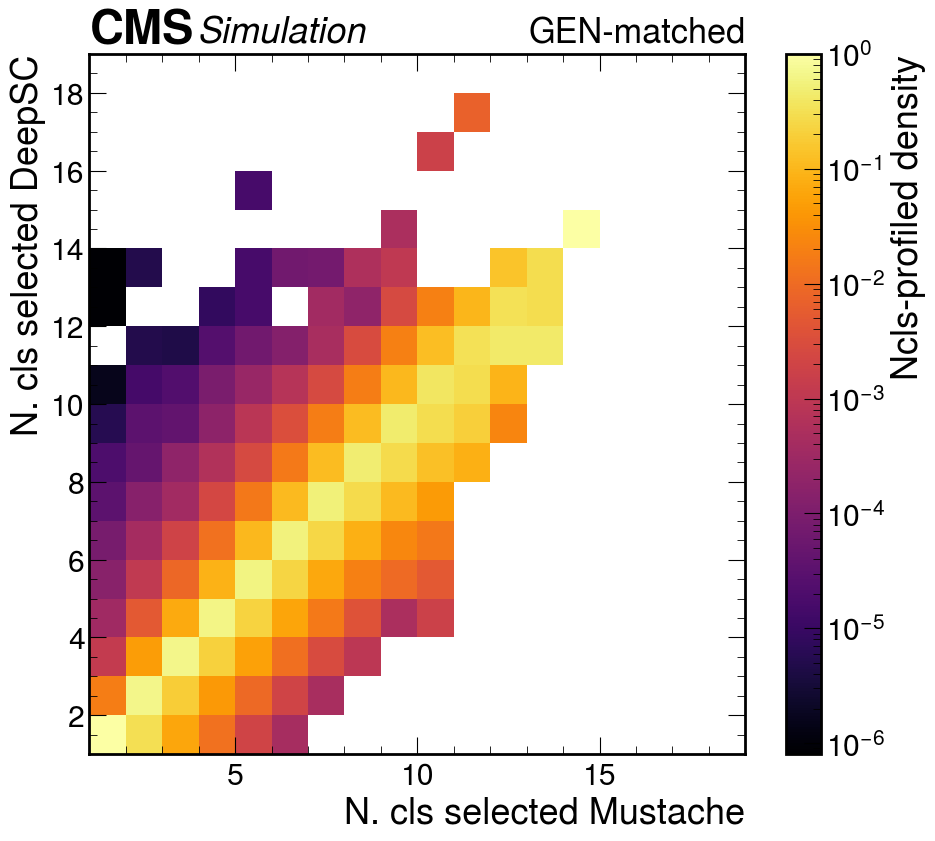

In [63]:
xbins = list(range(1, 20))
ybins =  list(range(1, 20))

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]

fig, ax = plt.subplots(1,1, figsize=(10,9),dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_sel_M, 
                                  dfmatched_sc.ncls_sel_D, bins=(xbins, ybins ))

s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(vmax=1), cmap="inferno")

fig.colorbar(I, ax=ax, label="Ncls-profiled density")
ax.set_ylabel("N. cls selected DeepSC")
ax.set_xlabel("N. cls selected Mustache")

hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_SC_ncls.png")
plt.savefig(f"{output_folder}/Matched_genparticle_SC_ncls.pdf")

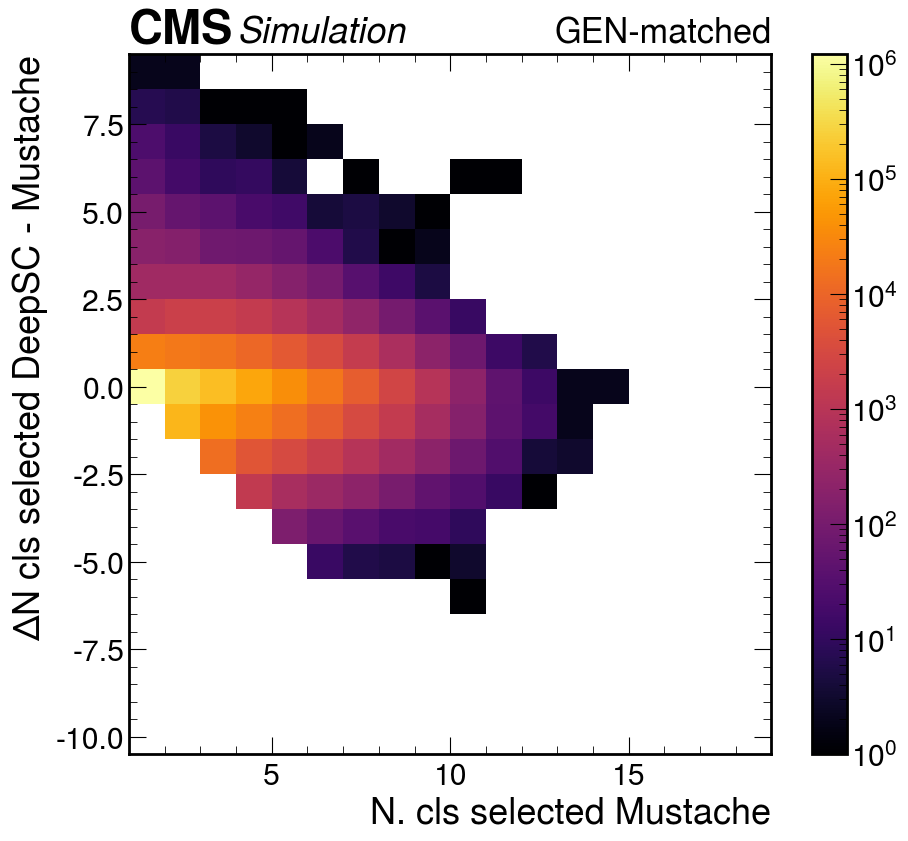

In [64]:
xbins = list(range(1, 20))
ybins =  [f+0.5 for f in range(-11, 10)]

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]

fig, ax = plt.subplots(1,1, figsize=(10,9),dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_sel_M, 
                                  dfmatched_sc.ncls_sel_D-dfmatched_sc.ncls_sel_M, bins=(xbins, ybins ))

#s = np.expand_dims(np.sum(A, axis=-1), axis=1)
#a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, A.T, cmap="inferno",norm=LogNorm())

fig.colorbar(I, ax=ax)
ax.set_xlabel("N. cls selected Mustache")
ax.set_ylabel("$\Delta N$ cls selected DeepSC - Mustache")

hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_SC_ncls_diff.png")
plt.savefig(f"{output_folder}/Matched_genparticle_SC_ncls_diff.pdf")

/tmp/ipykernel_11218/306725357.py:13: RuntimeWarning: invalid value encountered in divide
  a = A/s


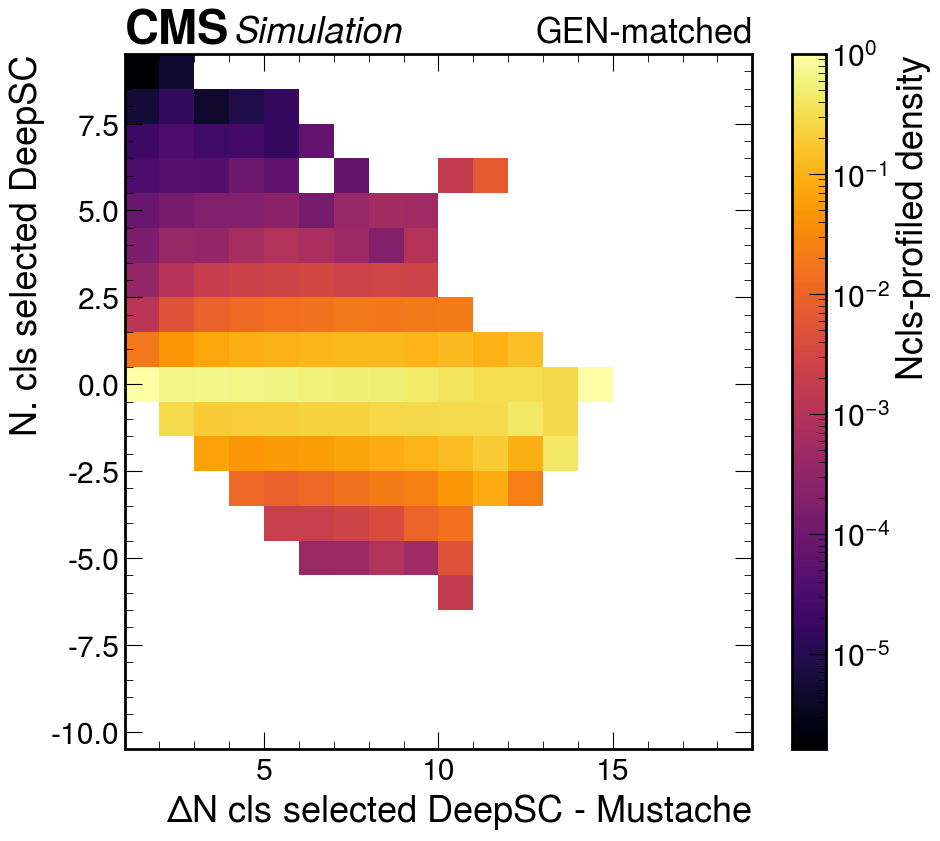

In [65]:
xbins = list(range(1, 20))
ybins =  [f+0.5 for f in range(-11, 10)]

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]

fig, ax = plt.subplots(1,1, figsize=(10,9),dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_sel_M, 
                                  dfmatched_sc.ncls_sel_D-dfmatched_sc.ncls_sel_M, bins=(xbins, ybins ))

s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(vmax=1), cmap="inferno")

fig.colorbar(I, ax=ax, label="Ncls-profiled density")
ax.set_ylabel("N. cls selected DeepSC")
ax.set_xlabel("$\Delta N$ cls selected DeepSC - Mustache")

hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_SC_ncls_diff_profiled.png")
plt.savefig(f"{output_folder}/Matched_genparticle_SC_ncls_diff_profiled.pdf")

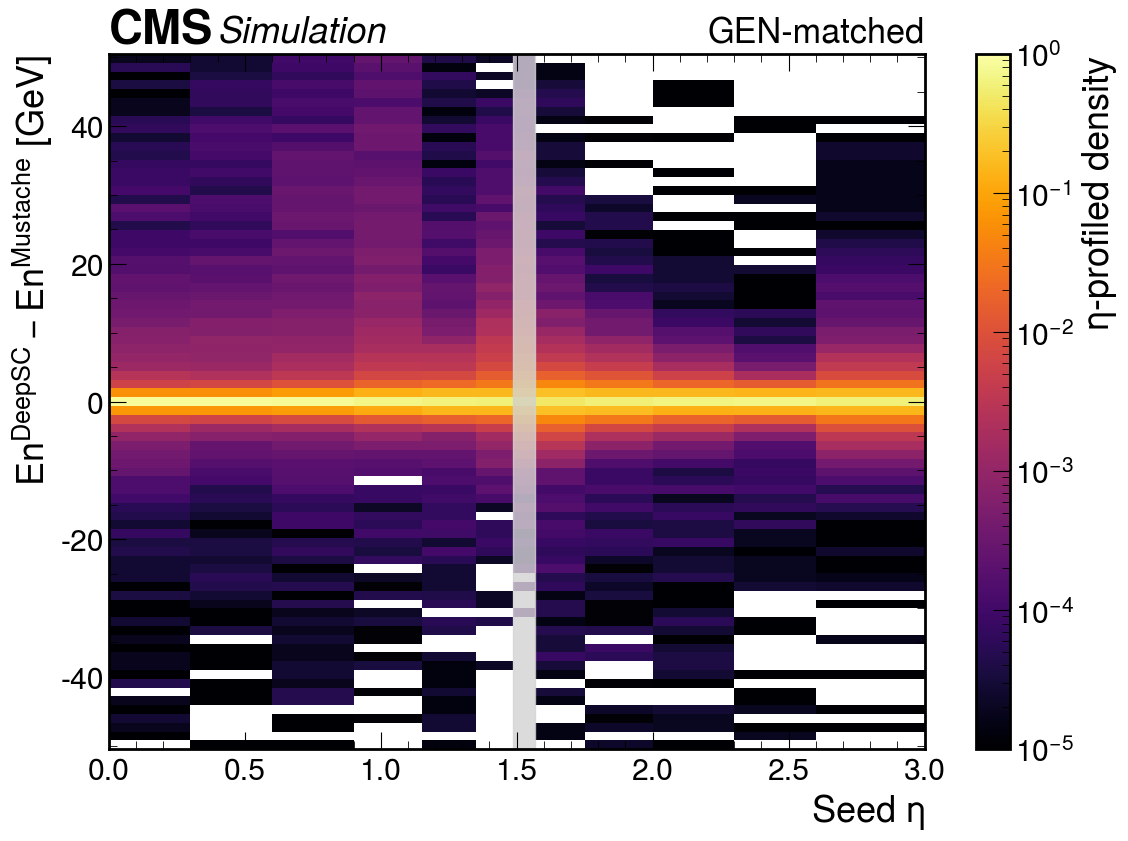

In [66]:
etas =  [0, 0.3,0.6, 0.9, 1.15, 1.35, 1.485, 1.566, 1.75,2.,2.3,2.6,3]
xbins = np.linspace(-50.5,50.5,80)

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]

fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.seed_eta_M, 
                                  dfmatched_sc.et_sc_calib_D - dfmatched_sc.et_sc_calib_M,
                                  bins=(etas, xbins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

ax.fill_between([1.485, 1.566], [-50.5,-50.5],[50.5,50.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax, label="$\eta$-profiled density")   
ax.set_ylabel("$En^{DeepSC} - En^{Mustache}$ [GeV]")
ax.set_xlabel("Seed $\eta$")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)

plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_dEnergy_etaM.png")
plt.savefig(f"{output_folder}/Matched_genparticle_dEnergy_etaM.pdf")

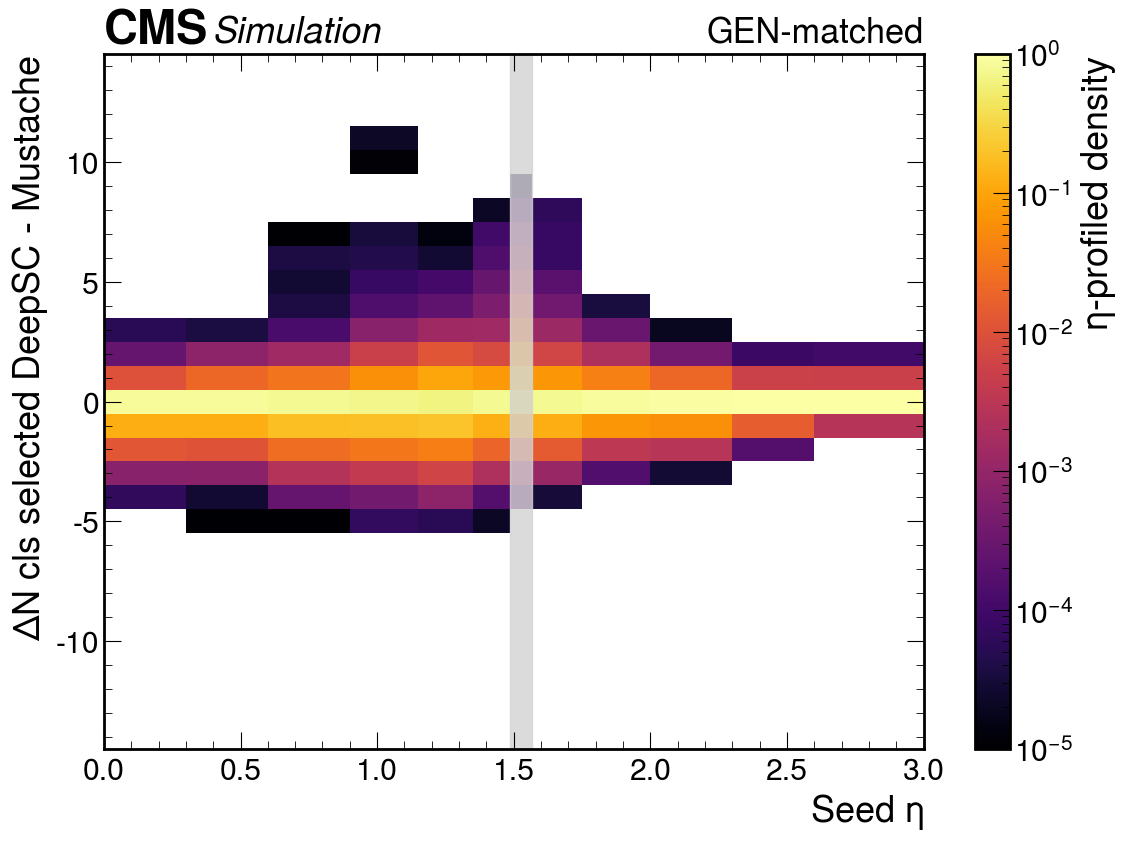

In [168]:
etas =  [0, 0.3,0.6, 0.9, 1.15, 1.35, 1.485, 1.566, 1.75,2.,2.3,2.6,3]
ybins = np.linspace(-14.5,14.5,30)

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]

fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.seed_eta_M, 
                                  dfmatched_sc.ncls_sel_D - dfmatched_sc.ncls_sel_M,
                                  bins=(etas, ybins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

ax.fill_between([1.485, 1.566], [-14.5,-14.5],[14.5,14.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax, label="$\eta$-profiled density")   
ax.set_ylabel("$\Delta N$ cls selected DeepSC - Mustache")
ax.set_xlabel("Seed $\eta$")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)

plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_dncls_etaM.png")
plt.savefig(f"{output_folder}/Matched_genparticle_dncls_etaM.pdf")

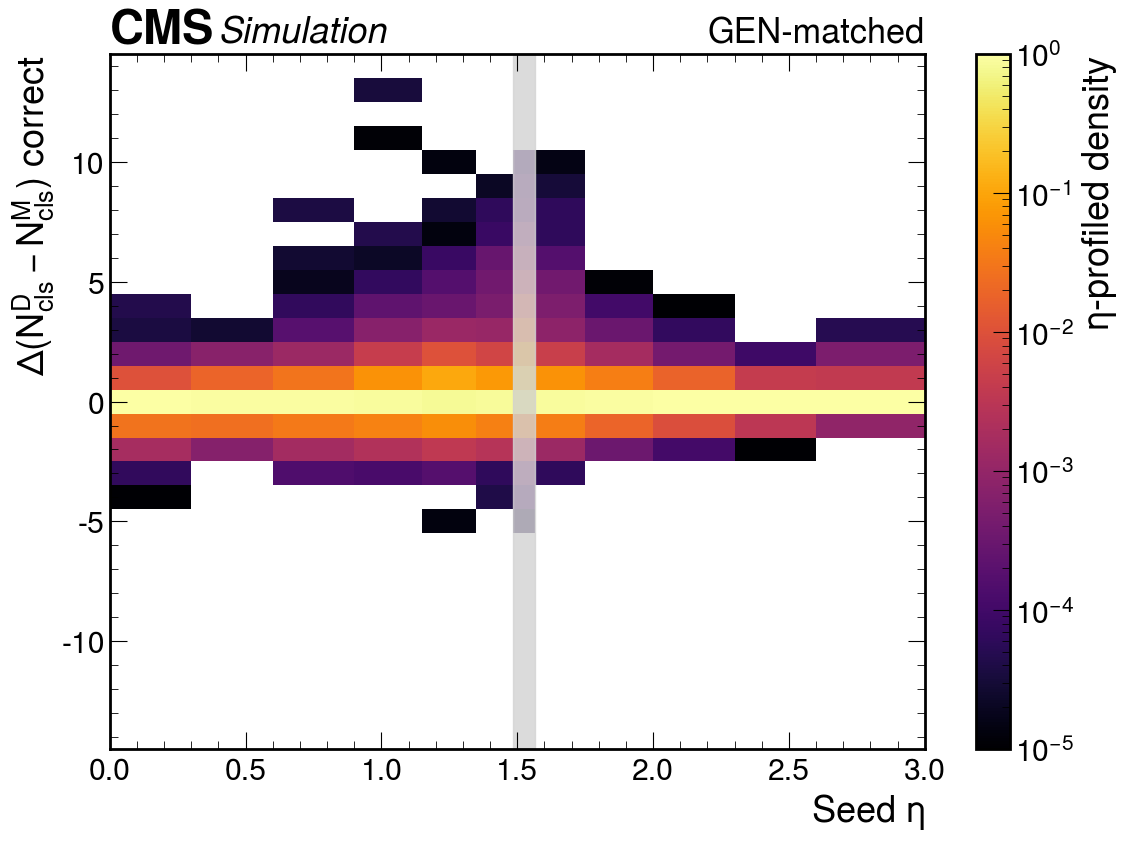

In [18]:
etas =  [0, 0.3,0.6, 0.9, 1.15, 1.35, 1.485, 1.566, 1.75,2.,2.3,2.6,3]
ybins = np.linspace(-14.5,14.5,30)

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]

fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.seed_eta_M, 
                                  dfmatched_sc.ncls_sel_true_D - dfmatched_sc.ncls_sel_true_M,
                                  bins=(etas, ybins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

ax.fill_between([1.485, 1.566], [-14.5,-14.5],[14.5,14.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax, label="$\eta$-profiled density")   
ax.set_ylabel("$\Delta(N_{cls}^D - N_{cls}^M)$ correct")
ax.set_xlabel("Seed $\eta$")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)

plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_dncls_true_etaM.png")
plt.savefig(f"{output_folder}/Matched_genparticle_dncls_true_etaM.pdf")

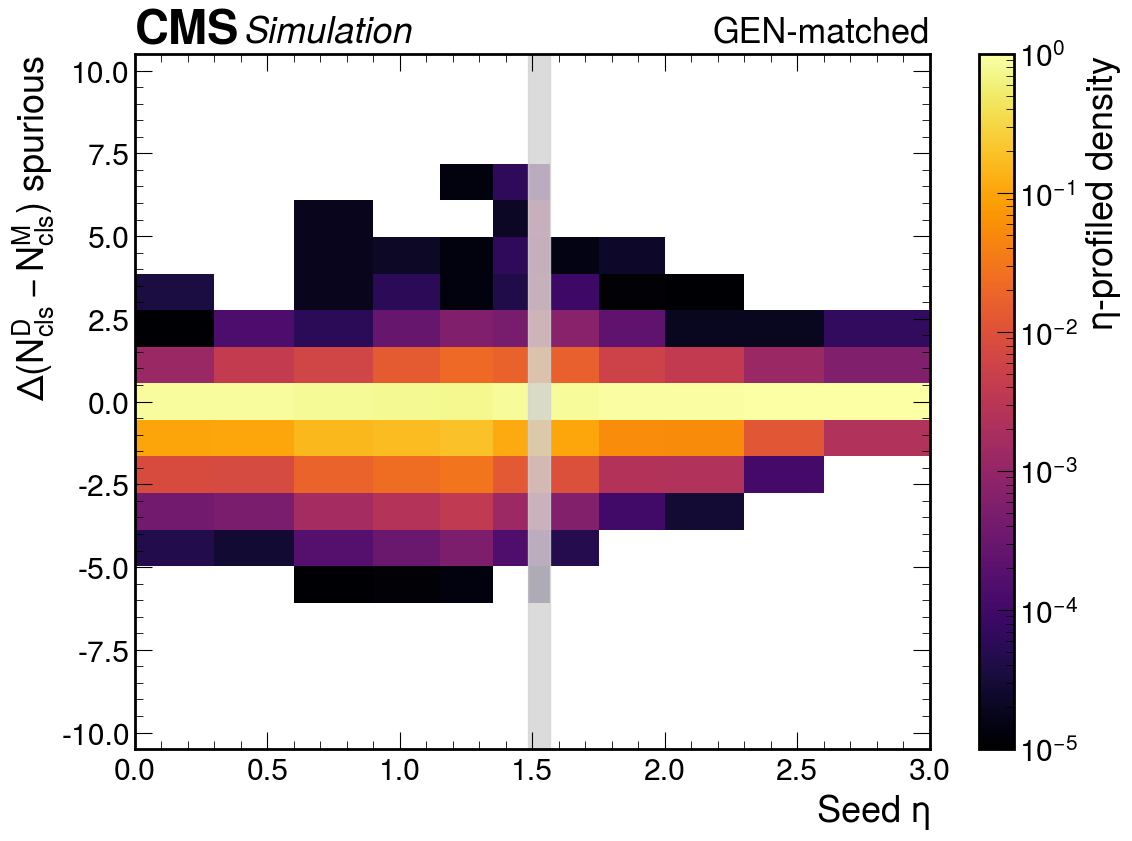

In [17]:
etas =  [0, 0.3,0.6, 0.9, 1.15, 1.35, 1.485, 1.566, 1.75,2.,2.3,2.6,3]
ybins = np.linspace(-10.5,10.5,20)

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]

fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.seed_eta_M, 
                                  dfmatched_sc.ncls_sel_false_D - dfmatched_sc.ncls_sel_false_M,
                                  bins=(etas, ybins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

ax.fill_between([1.485, 1.566], [-10.5,-10.5],[10.5,10.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax, label="$\eta$-profiled density")   
ax.set_ylabel("$\Delta(N_{cls}^D - N_{cls}^M)$ spurious")
ax.set_xlabel("Seed $\eta$")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)

plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_dncls_false_etaM.png")
plt.savefig(f"{output_folder}/Matched_genparticle_dncls_false_etaM.pdf")

/tmp/ipykernel_11218/565477290.py:12: RuntimeWarning: invalid value encountered in divide
  a = A/s


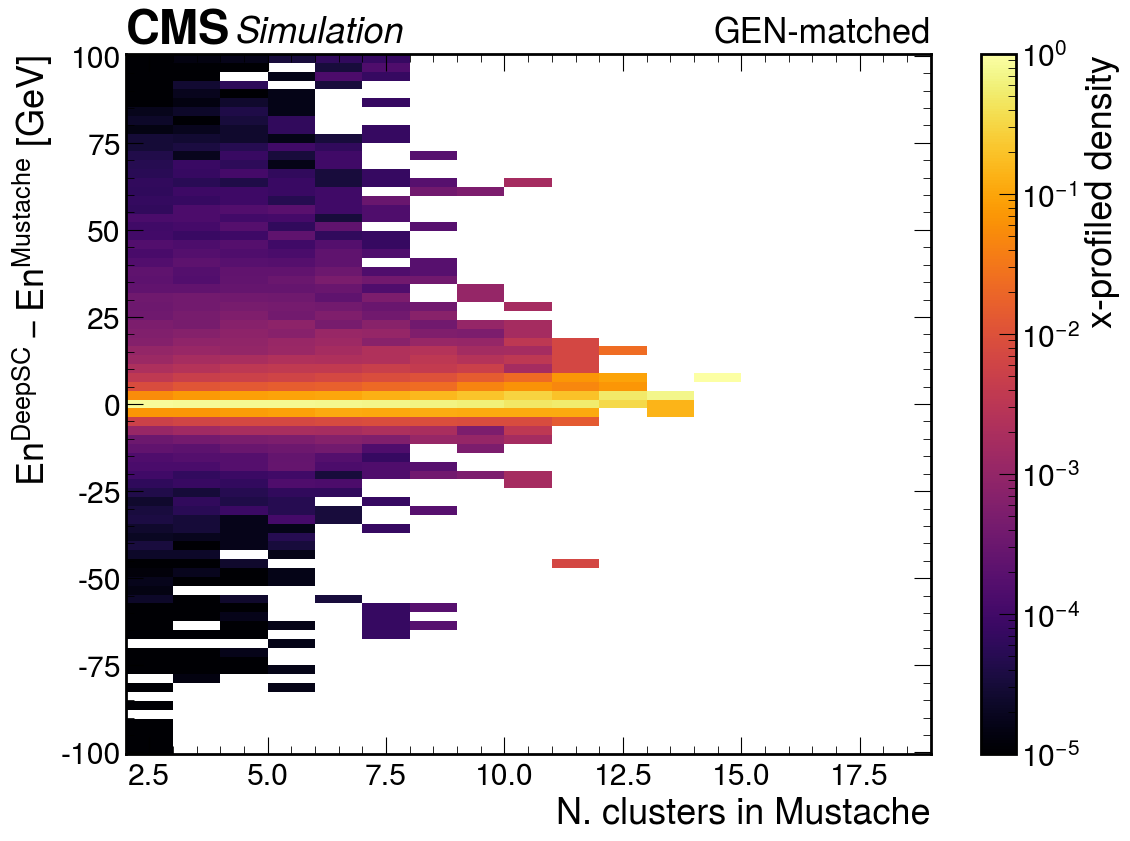

In [71]:
etas =  np.arange(2, 20)
xbins = np.linspace(-100.5,100.5,80)

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]
fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_sel_M, 
                                  dfmatched_sc.et_sc_calib_D - dfmatched_sc.et_sc_calib_M,
                                  bins=(etas, xbins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

#ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax, label="x-profiled density")   
ax.set_ylabel("$En^{DeepSC} - En^{Mustache}$ [GeV]")
ax.set_xlabel("N. clusters in Mustache")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_dEnergy_nclsM.png")
plt.savefig(f"{output_folder}/Matched_genparticle_dEnergy_nclsM.pdf")

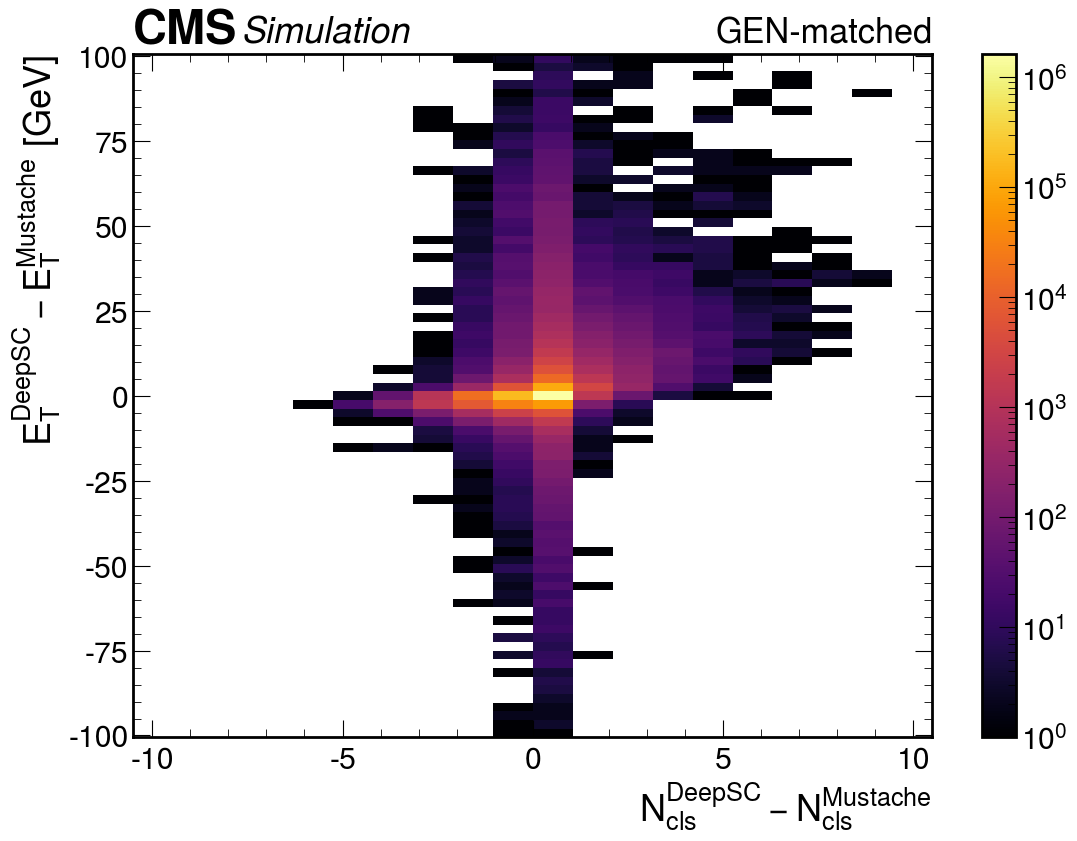

In [78]:
etas =  np.linspace(-10.5,10.5,21)
xbins = np.linspace(-100.5,100.5,80)

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]
fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_sel_D- dfmatched_sc.ncls_sel_M, 
                                  dfmatched_sc.et_sc_calib_D - dfmatched_sc.et_sc_calib_M,
                                  bins=(etas, xbins ))
# s = np.expand_dims(np.sum(A, axis=-1), axis=1)
# a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, A.T, norm=LogNorm(), cmap="inferno")

#ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax)   
ax.set_ylabel("$E_T^{DeepSC} - E_T^{Mustache}$ [GeV]")
ax.set_xlabel("$N_{cls}^{DeepSC} -N_{cls}^{Mustache} $")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_dEnergy_dncls_noprof.png")
plt.savefig(f"{output_folder}/Matched_genparticle_dEnergy_dncls_noprof.pdf")

/tmp/ipykernel_11218/3867943624.py:12: RuntimeWarning: invalid value encountered in divide
  a = A/s


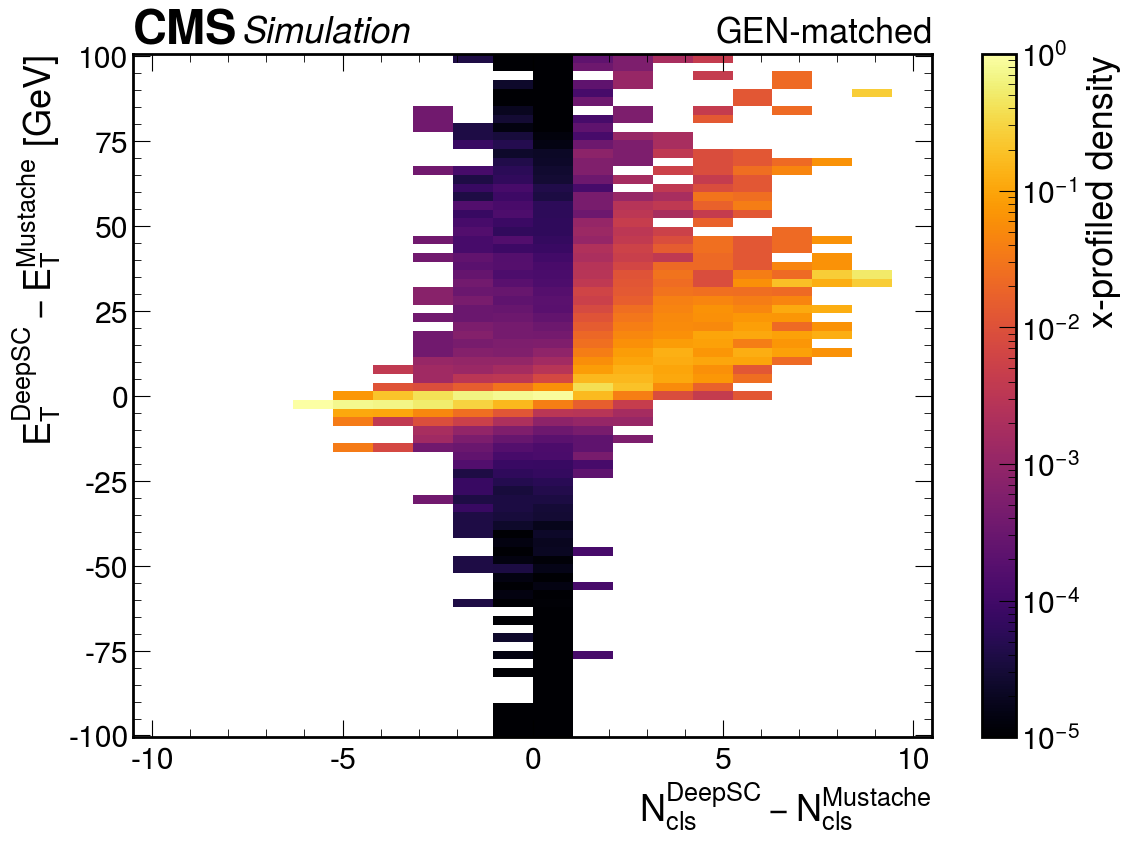

In [79]:
etas =  np.linspace(-10.5,10.5,21)
xbins = np.linspace(-100.5,100.5,80)

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]
fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_sel_D- dfmatched_sc.ncls_sel_M, 
                                  dfmatched_sc.et_sc_calib_D - dfmatched_sc.et_sc_calib_M,
                                  bins=(etas, xbins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

#ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax, label="x-profiled density")   
ax.set_ylabel("$E_T^{DeepSC} - E_T^{Mustache}$ [GeV]")
ax.set_xlabel("$N_{cls}^{DeepSC} -N_{cls}^{Mustache} $")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_dEnergy_dncls.png")
plt.savefig(f"{output_folder}/Matched_genparticle_dEnergy_dncls.pdf")

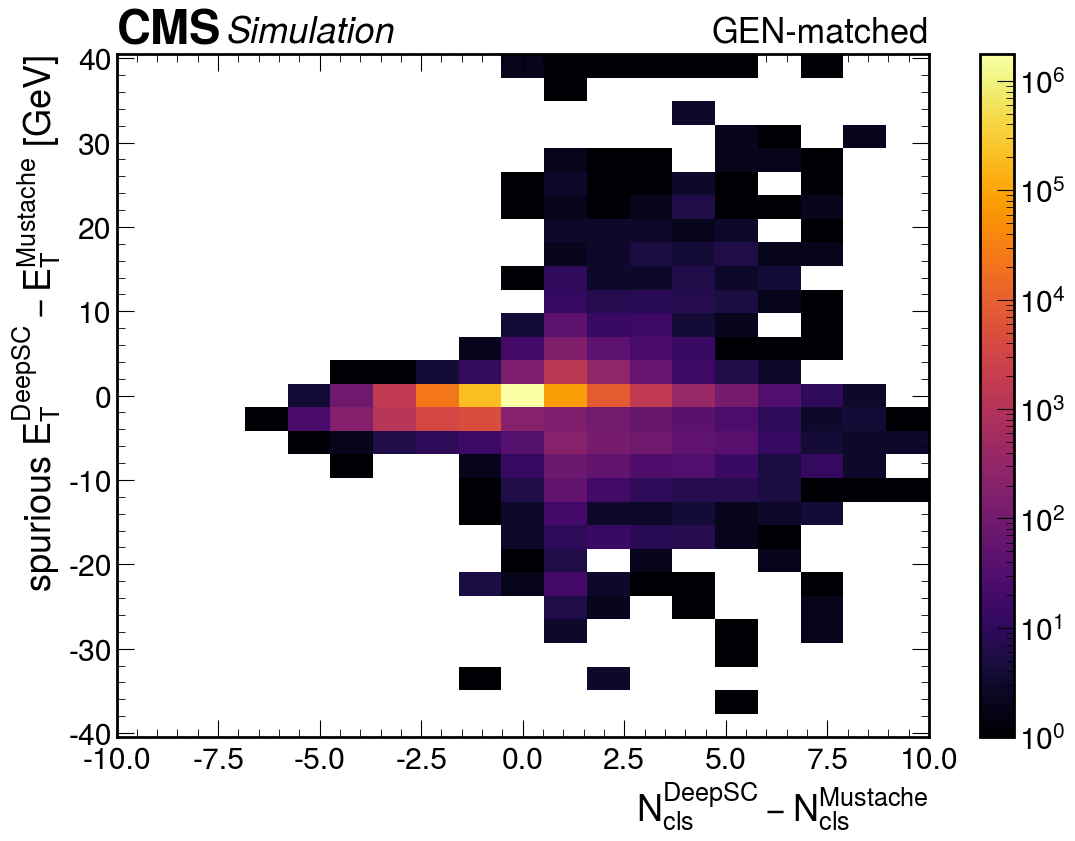

In [28]:
xbins =  np.linspace(-10,10,20)
ybins = np.linspace(-40.5,40.5,30)

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]
fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_sel_D- dfmatched_sc.ncls_sel_M, 
                                 dfmatched_sc.sel_false_energy_cls_D/np.cosh(dfmatched_sc.seed_eta_D) - dfmatched_sc.sel_false_energy_cls_M/np.cosh(dfmatched_sc.seed_eta_M),
                                  bins=(xbins, ybins ))
# s = np.expand_dims(np.sum(A, axis=-1), axis=1)
# a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, A.T, norm=LogNorm(), cmap="inferno", )

#ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax)   
ax.set_ylabel("spurious $E_T^{DeepSC} - E_T^{Mustache}$ [GeV]")
ax.set_xlabel("$N_{cls}^{DeepSC} -N_{cls}^{Mustache} $")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_dEnergySpurious_dncls.png")
plt.savefig(f"{output_folder}/Matched_genparticle_dEnergySpurious_dncls.pdf")

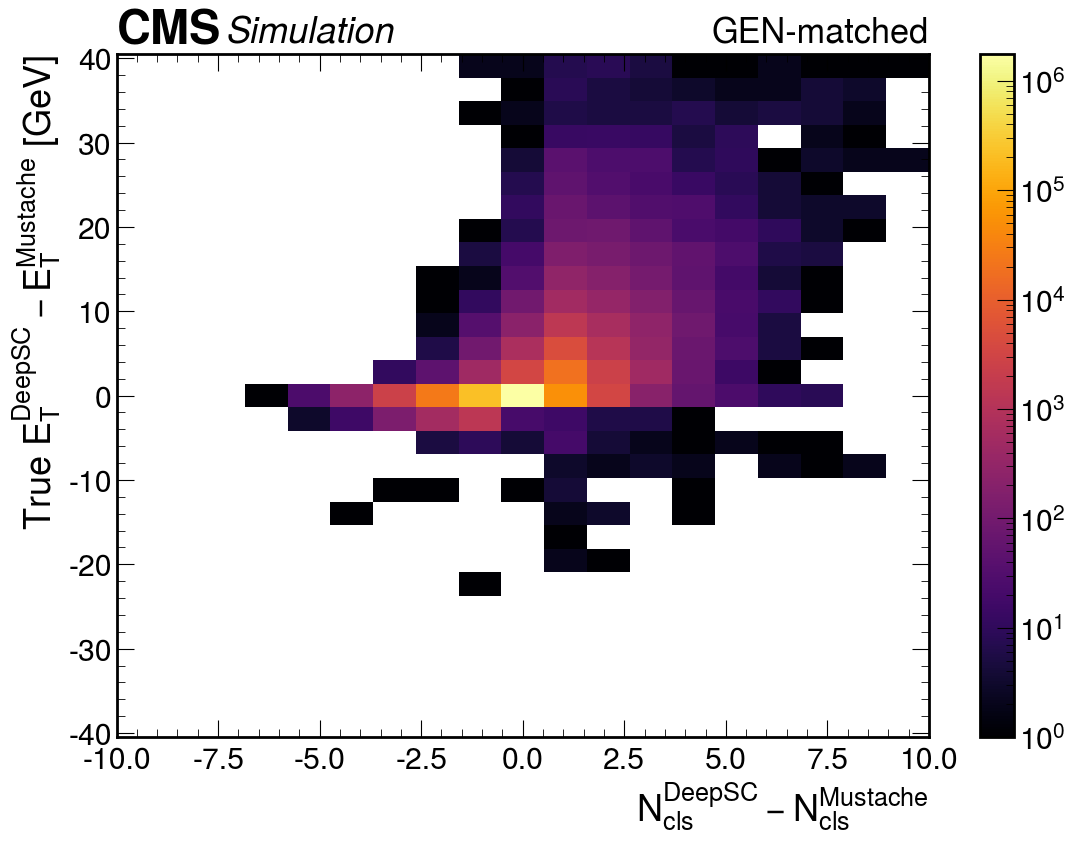

In [29]:
xbins =  np.linspace(-10,10,20)
ybins = np.linspace(-40.5,40.5,30)

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]
fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_sel_D- dfmatched_sc.ncls_sel_M, 
                                 dfmatched_sc.sel_true_energy_cls_D/np.cosh(dfmatched_sc.seed_eta_D) - dfmatched_sc.sel_true_energy_cls_M/np.cosh(dfmatched_sc.seed_eta_M),
                                  bins=(xbins, ybins ))
# s = np.expand_dims(np.sum(A, axis=-1), axis=1)
# a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, A.T, norm=LogNorm(), cmap="inferno", )

#ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax)   
ax.set_ylabel("True $E_T^{DeepSC} - E_T^{Mustache}$ [GeV]")
ax.set_xlabel("$N_{cls}^{DeepSC} -N_{cls}^{Mustache} $")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_dEnergyCorrect_dncls.png")
plt.savefig(f"{output_folder}/Matched_genparticle_dEnergyCorrect_dncls.pdf")

In [82]:
dfmatched_sc.columns

Index(['genpart_index', 'elematched_D', 'ele_index_D', 'deltaR_genPart_ele_D',
       'calomatched_D', 'caloindex_D', 'sc_matched_D', 'sc_index_D',
       'seed_index_D', 'en_seed_D',
       ...
       'genpart_en_M', 'genpart_et_M', 'genpart_eta_M', 'genpart_phi_M',
       'genpart_pt_M', 'nVtx_M', 'rho_M', 'obsPU_M', 'truePU_M', '_merge'],
      dtype='object', length=184)

/tmp/ipykernel_23875/3248926243.py:12: RuntimeWarning: invalid value encountered in divide
  a = A/s


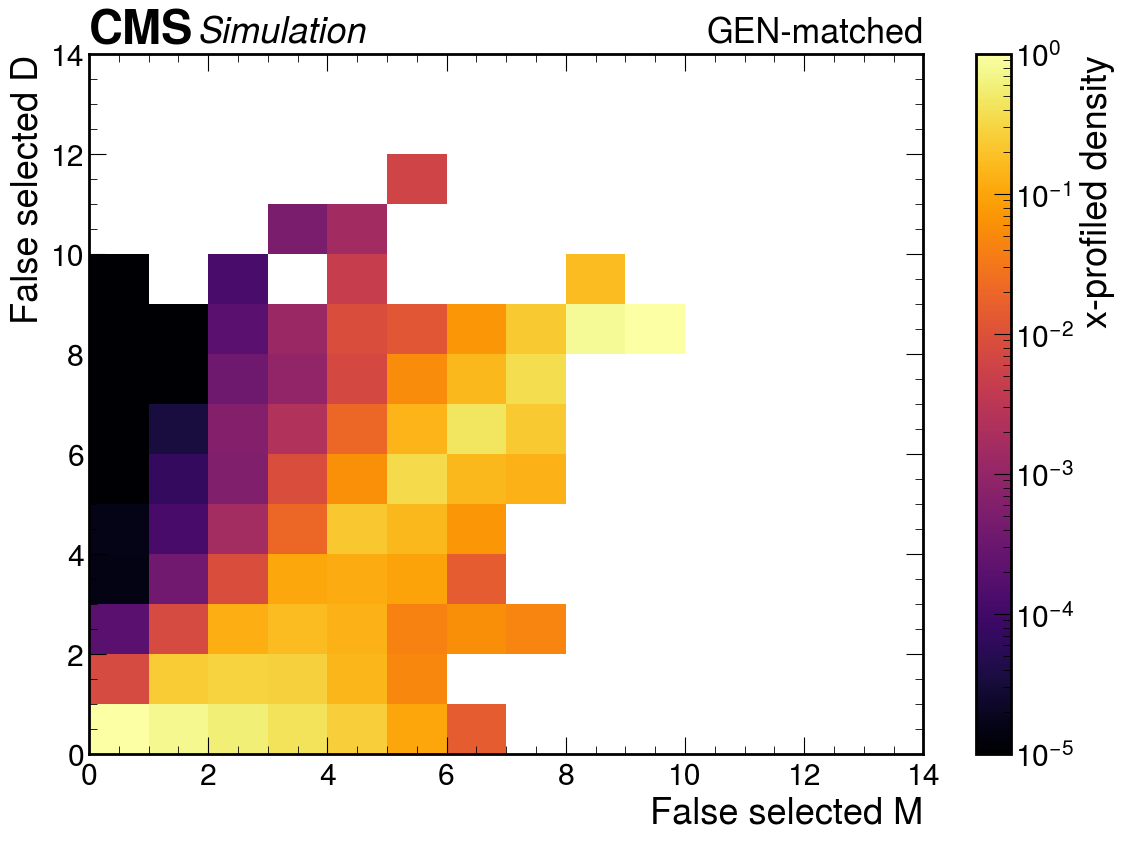

In [10]:
etas =  list(range(15))
xbins =  list(range(15))

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]
fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_sel_false_M,
                                  dfmatched_sc.ncls_sel_false_D,
                                  bins=(etas, xbins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

#ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax, label="x-profiled density")   
ax.set_ylabel("False selected D")
ax.set_xlabel("False selected M")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_false_cls_profiled.png")
plt.savefig(f"{output_folder}/Matched_genparticle_false_cls_profiled.pdf")

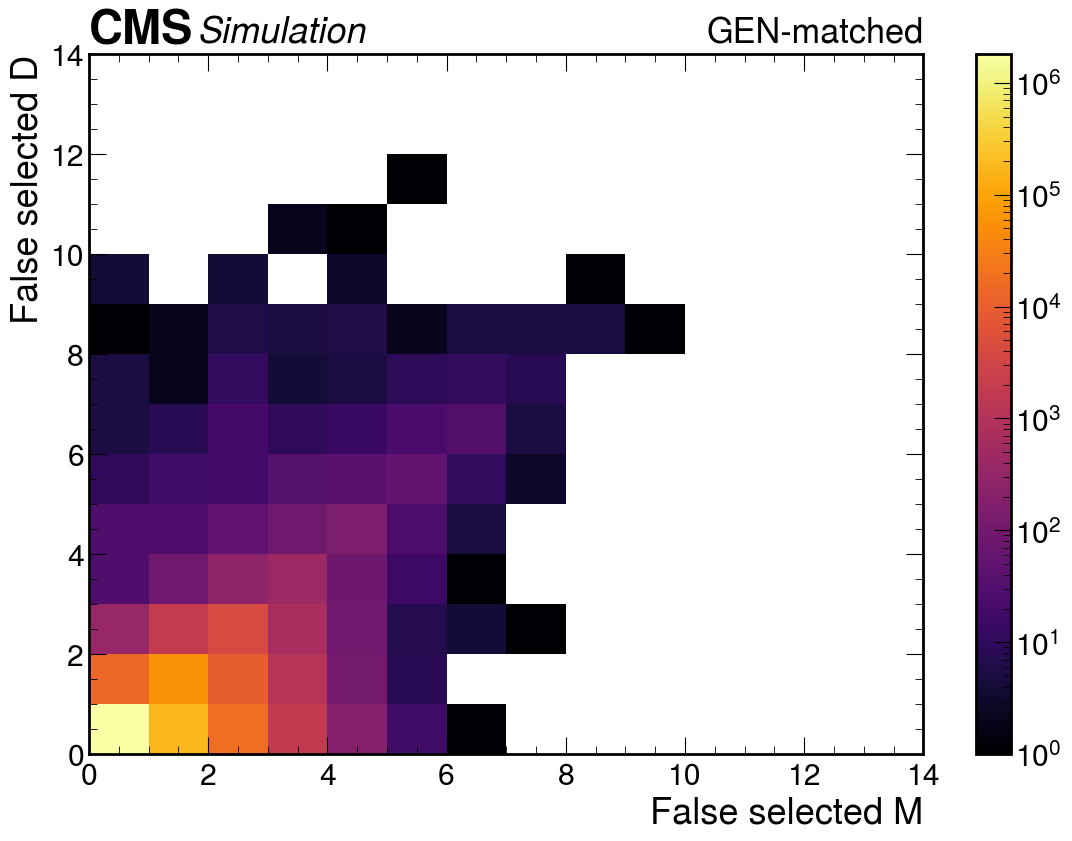

In [9]:
etas =  list(range(15))
xbins =  list(range(15))

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]
fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_sel_false_M,
                                  dfmatched_sc.ncls_sel_false_D,
                                  bins=(etas, xbins ))
# s = np.expand_dims(np.sum(A, axis=-1), axis=1)
# a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, A.T, norm=LogNorm(), cmap="inferno")

#ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax,)   
ax.set_ylabel("False selected D")
ax.set_xlabel("False selected M")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_false_cls.png")
plt.savefig(f"{output_folder}/Matched_genparticle_false_cls.pdf")

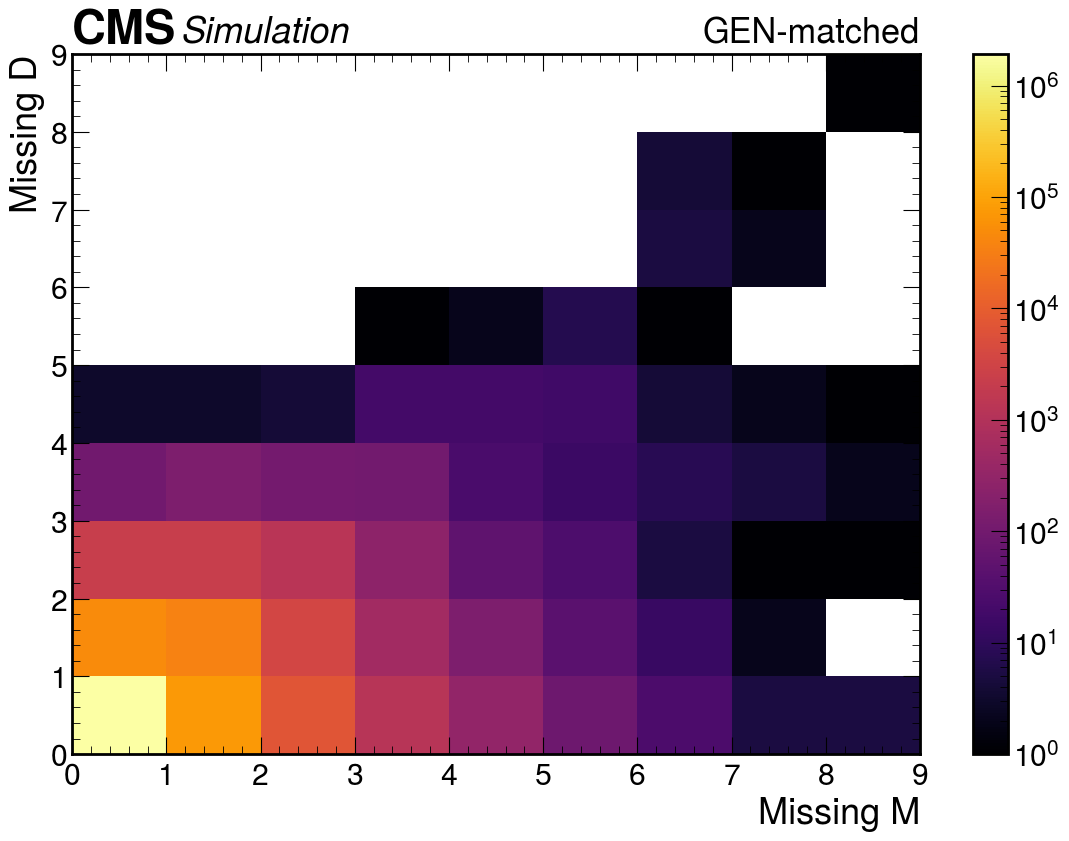

In [12]:
etas =  list(range(10))
xbins =  list(range(10))

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]
fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_missing_M,
                                  dfmatched_sc.ncls_missing_D,
                                  bins=(etas, xbins ))
# s = np.expand_dims(np.sum(A, axis=-1), axis=1)
# a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, A.T, norm=LogNorm(), cmap="inferno")

#ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax, )   
ax.set_ylabel("Missing D")
ax.set_xlabel("Missing M")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_missing_cls.png")
plt.savefig(f"{output_folder}/Matched_genparticle_missing_cls.pdf")

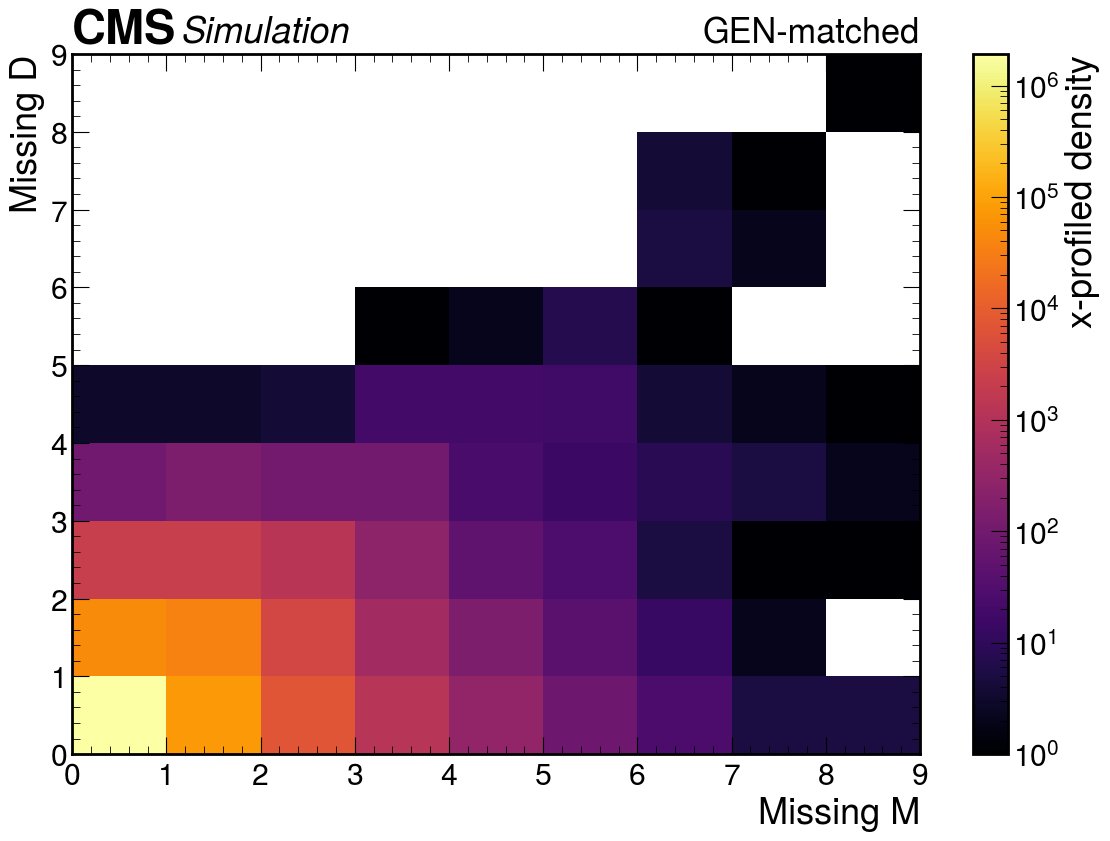

In [13]:
etas =  list(range(10))
xbins =  list(range(10))

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]
fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_missing_M,
                                  dfmatched_sc.ncls_missing_D,
                                  bins=(etas, xbins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, A.T, norm=LogNorm(), cmap="inferno")

#ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax, label="x-profiled density")   
ax.set_ylabel("Missing D")
ax.set_xlabel("Missing M")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_missing_cls_profiled.png")
plt.savefig(f"{output_folder}/Matched_genparticle_missing_cls_profiled.pdf")

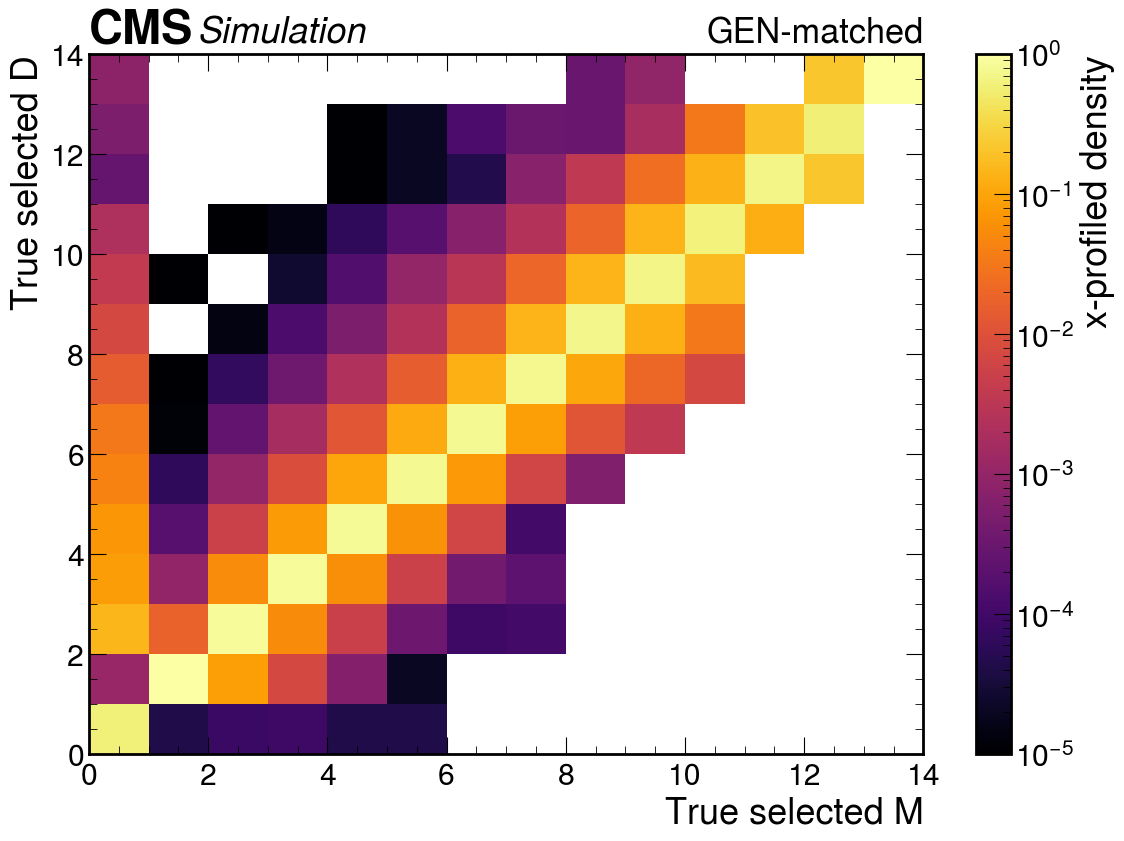

In [16]:
etas =  list(range(15))
xbins =  list(range(15))

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]
fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_sel_true_M,
                                  dfmatched_sc.ncls_sel_true_D,
                                  bins=(etas, xbins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

#ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax, label="x-profiled density")   
ax.set_ylabel("True selected D")
ax.set_xlabel("True selected M")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_true_cls_profiled.png")
plt.savefig(f"{output_folder}/Matched_genparticle_true_cls_profiled.pdf")

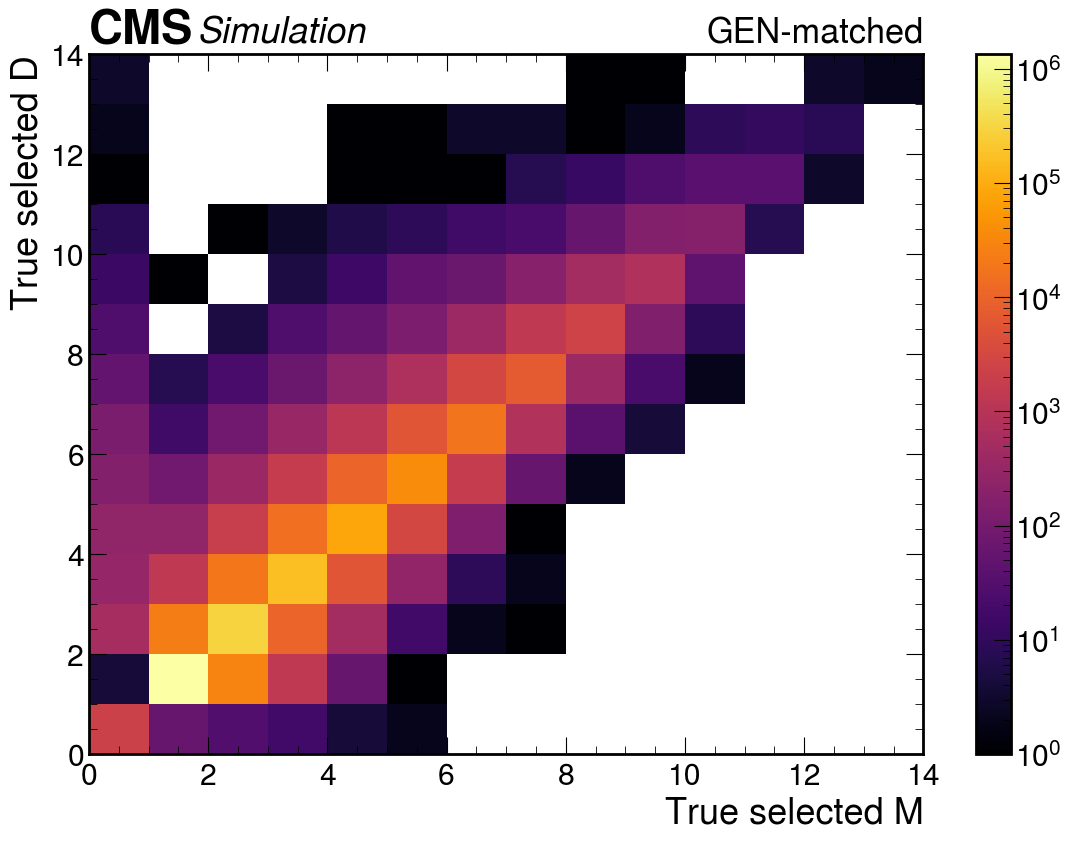

In [17]:
etas =  list(range(15))
xbins =  list(range(15))

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]
fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_sel_true_M,
                                  dfmatched_sc.ncls_sel_true_D,
                                  bins=(etas, xbins ))
# s = np.expand_dims(np.sum(A, axis=-1), axis=1)
# a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, A.T, norm=LogNorm(), cmap="inferno")

#ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax)   
ax.set_ylabel("True selected D")
ax.set_xlabel("True selected M")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_true_cls.png")
plt.savefig(f"{output_folder}/Matched_genparticle_true_cls.pdf")

### Recall and purity plots

In [37]:
ets = [0,5,10,15, 20,40,60,80,100]
etas = [0, 0.4,0.8, 1.2,1.479, 1.566, 1.75,2.,2.3,2.6,3]
ncls = [1,2,3,5,10,12,15,17,20,25,30]
nvtx = [20,30,35,40,45,50,55,60,65,70,75,80,90,100,130]

is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]

dfmatched_sc["eta_bin_D"] = pd.cut(abs(dfmatched_sc.genpart_eta_D), etas, labels=list(range(len(etas)-1)))
dfmatched_sc["et_bin_D"] = pd.cut(dfmatched_sc.genpart_pt_D, ets, labels=list(range(len(ets)-1)))
dfmatched_sc["ncls_bin_D"] = pd.cut(dfmatched_sc.ncls_tot_D, ncls, labels=list(range(len(ncls)-1)))
dfmatched_sc["eta_bin_M"] = pd.cut(abs(dfmatched_sc.genpart_eta_D), etas, labels=list(range(len(etas)-1)))
dfmatched_sc["et_bin_M"] = pd.cut(dfmatched_sc.genpart_pt_M, ets, labels=list(range(len(ets)-1)))
dfmatched_sc["ncls_bin_M"] = pd.cut(dfmatched_sc.ncls_tot_M, ncls, labels=list(range(len(ncls)-1)))


/tmp/ipykernel_30387/95728982.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmatched_sc["eta_bin_D"] = pd.cut(abs(dfmatched_sc.genpart_eta_D), etas, labels=list(range(len(etas)-1)))
/tmp/ipykernel_30387/95728982.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmatched_sc["et_bin_D"] = pd.cut(dfmatched_sc.genpart_pt_D, ets, labels=list(range(len(ets)-1)))
/tmp/ipykernel_30387/95728982.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

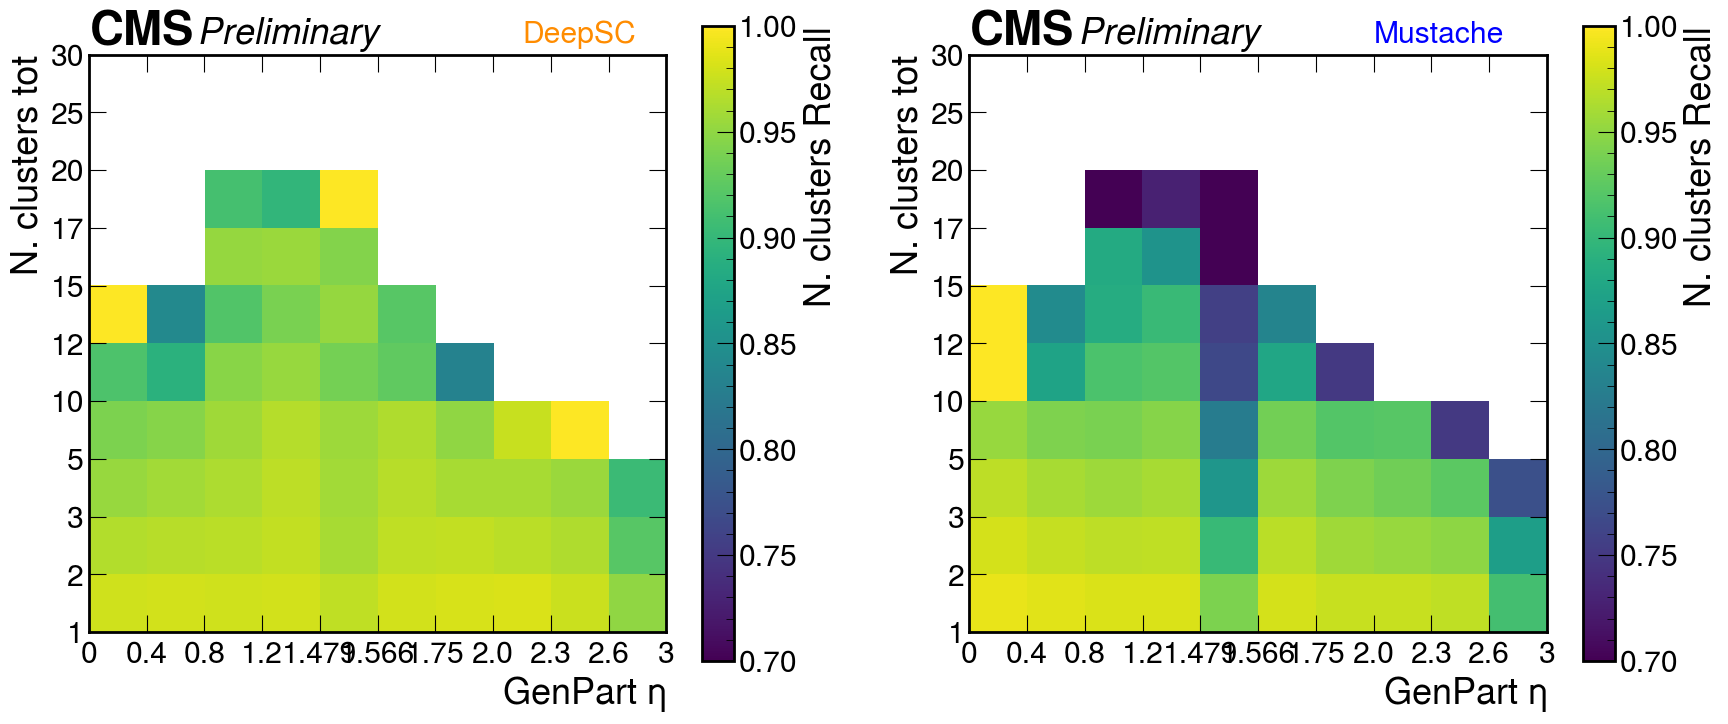

In [38]:
res_dsc =  dfmatched_sc.groupby(["eta_bin_D", "ncls_bin_D"])\
                 .apply( lambda gr:  (gr.ncls_sel_true_D / gr.ncls_true_D).mean())

new_index = pd.MultiIndex.from_product(res_dsc.index.levels)
res_dsc = res_dsc.reindex(new_index)
res_dsc.fillna(0).astype(float)

res_mst =  dfmatched_sc.groupby(["eta_bin_M", "ncls_bin_M"])\
                 .apply( lambda gr:  (gr.ncls_sel_true_M / gr.ncls_true_M).mean())

new_index = pd.MultiIndex.from_product(res_mst.index.levels)
res_mst = res_mst.reindex(new_index)
res_mst.fillna(0).astype(float)

vmin=0.7

fig, (ax, ab) = plt.subplots(1,2, figsize=(18,8),dpi=100)
plt.subplots_adjust( wspace=0.3)

a1 = res_dsc.values.reshape((len(etas)-1,len(ncls)-1))
a1[a1==0] = np.nan
a2 = res_mst.values.reshape((len(etas)-1,len(ncls)-1))
a2[a2==0] = np.nan

A = ax.imshow(a1.T, vmin=vmin, vmax=1)
ax.set_xlabel("GenPart $\eta$")
ax.set_ylabel("N. clusters tot")
fig.colorbar(A , label="N. clusters Recall", ax=ax, shrink=0.9)

ax.set_yticks(np.arange(len(ncls)) - 0.5, minor=False)
ax.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ax.set_yticklabels(ncls)
ax.set_xticklabels(etas)

B = ab.imshow(a2.T, vmin=vmin, vmax=1)
ab.set_xlabel("GenPart $\eta$")
ab.set_ylabel("N. clusters tot")
fig.colorbar(B , label="N. clusters Recall", ax=ab, shrink=0.9)


ab.set_yticks(np.arange(len(ncls)) - 0.5, minor=False)
ab.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ab.set_yticklabels(ncls)
ab.set_xticklabels(etas)

ax.text(0.75, 1.02, "DeepSC", transform=ax.transAxes, color='darkorange', fontsize="small", fontweight='roman')
ab.text(0.7, 1.02, "Mustache", transform=ab.transAxes, color='blue', fontsize="small", fontweight='roman')
# ax.text(0.7, 0.9,  flavour, transform=ax.transAxes, fontsize="small", )
# ab.text(0.7, 0.9, flavour, transform=ab.transAxes, fontsize="small")

ax.minorticks_off()
ab.minorticks_off()

hep.cms.text("Preliminary ",loc=0, ax=ax)
hep.cms.text("Preliminary ",loc=0, ax=ab)


plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_ncls_recall.png")
plt.savefig(f"{output_folder}/Matched_ncls_recall.pdf")

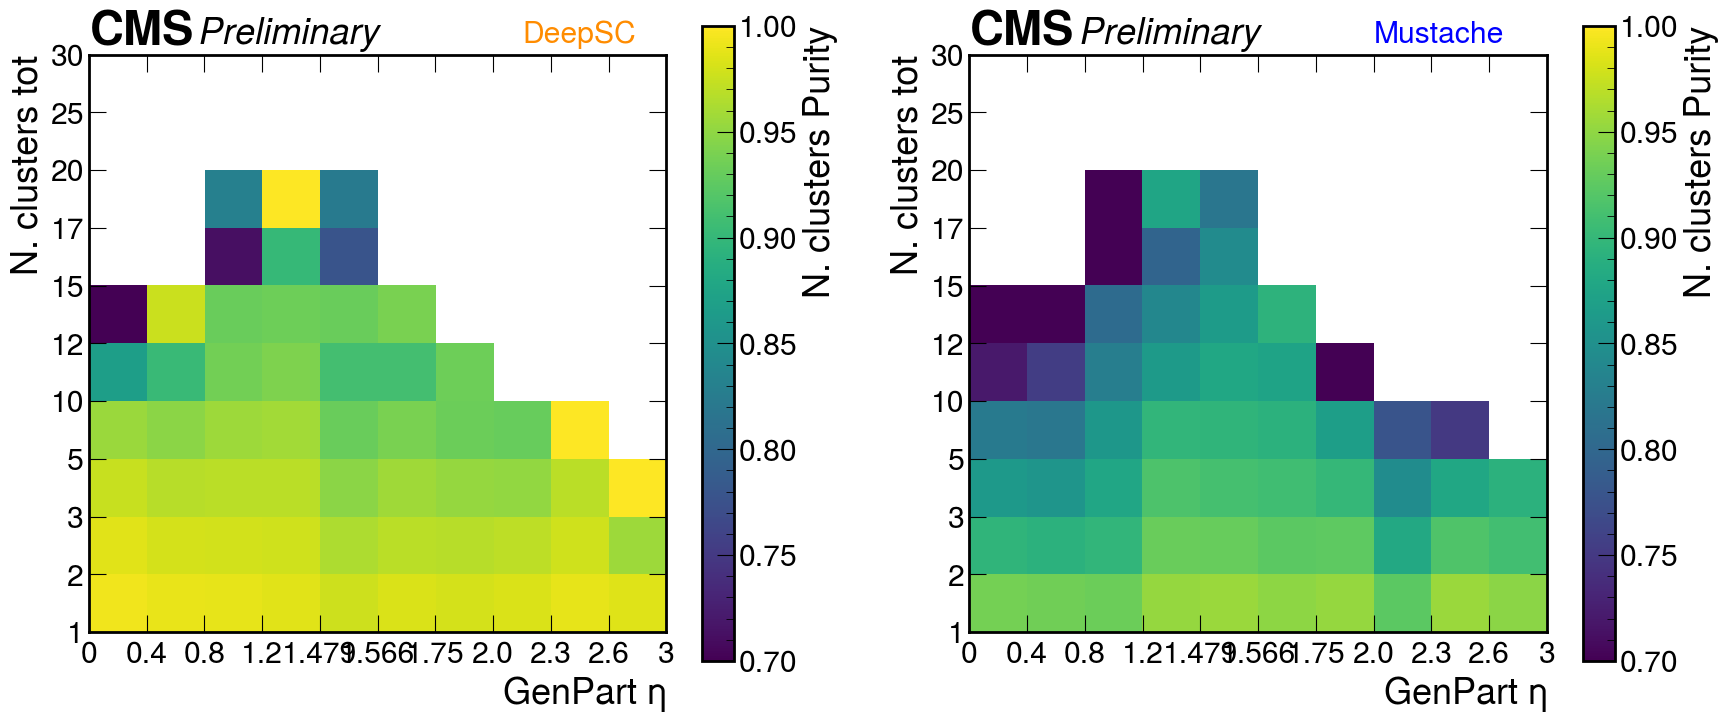

In [42]:
res_dsc =  dfmatched_sc.groupby(["eta_bin_D", "ncls_bin_D"])\
                 .apply( lambda gr:  (gr.ncls_sel_true_D / gr.ncls_sel_D).mean())

new_index = pd.MultiIndex.from_product(res_dsc.index.levels)
res_dsc = res_dsc.reindex(new_index)
res_dsc.fillna(0).astype(float)

res_mst =  dfmatched_sc.groupby(["eta_bin_M", "ncls_bin_M"])\
                 .apply( lambda gr:  (gr.ncls_sel_true_M / gr.ncls_sel_M).mean())

new_index = pd.MultiIndex.from_product(res_mst.index.levels)
res_mst = res_mst.reindex(new_index)
res_mst.fillna(0).astype(float)

vmin=0.7

fig, (ax, ab) = plt.subplots(1,2, figsize=(18,8),dpi=100)
plt.subplots_adjust( wspace=0.3)

a1 = res_dsc.values.reshape((len(etas)-1,len(ncls)-1))
a1[a1==0] = np.nan
a2 = res_mst.values.reshape((len(etas)-1,len(ncls)-1))
a2[a2==0] = np.nan

A = ax.imshow(a1.T, vmin=vmin, vmax=1)
ax.set_xlabel("GenPart $\eta$")
ax.set_ylabel("N. clusters tot")
fig.colorbar(A , label="N. clusters Purity", ax=ax, shrink=0.9)

ax.set_yticks(np.arange(len(ncls)) - 0.5, minor=False)
ax.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ax.set_yticklabels(ncls)
ax.set_xticklabels(etas)

B = ab.imshow(a2.T, vmin=vmin, vmax=1)
ab.set_xlabel("GenPart $\eta$")
ab.set_ylabel("N. clusters tot")
fig.colorbar(B , label="N. clusters Purity", ax=ab, shrink=0.9)


ab.set_yticks(np.arange(len(ncls)) - 0.5, minor=False)
ab.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ab.set_yticklabels(ncls)
ab.set_xticklabels(etas)

ax.text(0.75, 1.02, "DeepSC", transform=ax.transAxes, color='darkorange', fontsize="small", fontweight='roman')
ab.text(0.7, 1.02, "Mustache", transform=ab.transAxes, color='blue', fontsize="small", fontweight='roman')
# ax.text(0.7, 0.9,  flavour, transform=ax.transAxes, fontsize="small", )
# ab.text(0.7, 0.9, flavour, transform=ab.transAxes, fontsize="small")

ax.minorticks_off()
ab.minorticks_off()

hep.cms.text("Preliminary ",loc=0, ax=ax)
hep.cms.text("Preliminary ",loc=0, ax=ab)


plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_ncls_purity.png")
plt.savefig(f"{output_folder}/Matched_ncls_purity.pdf")

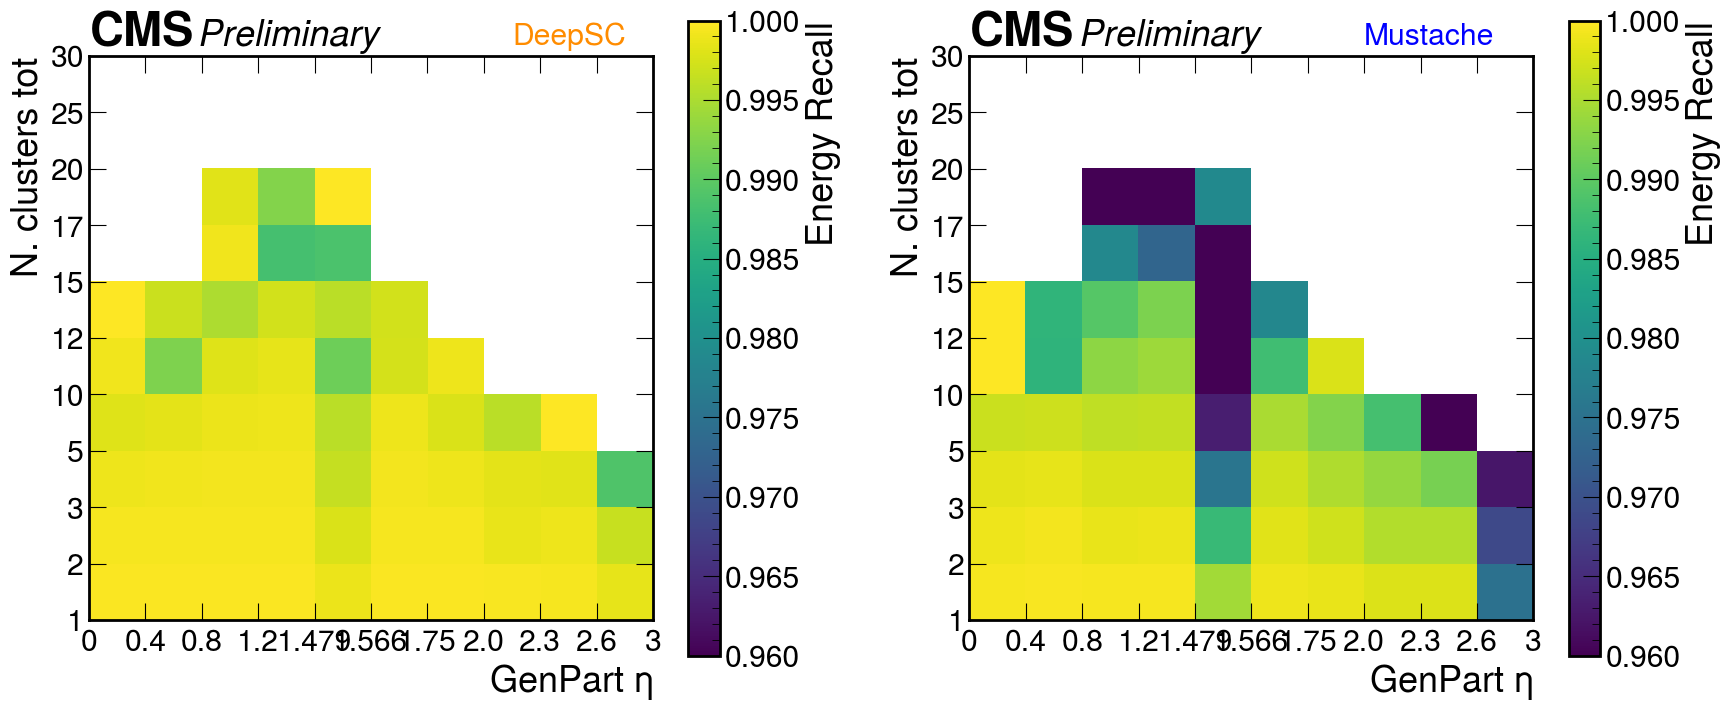

In [40]:
res_dsc =  dfmatched_sc.groupby(["eta_bin_D", "ncls_bin_D"])\
                 .apply( lambda gr:  (gr.sel_true_energy_cls_D / gr.true_energy_cls_D).mean())

new_index = pd.MultiIndex.from_product(res_dsc.index.levels)
res_dsc = res_dsc.reindex(new_index)
res_dsc.fillna(0).astype(float)

res_mst =  dfmatched_sc.groupby(["eta_bin_M", "ncls_bin_M"])\
                 .apply( lambda gr:  (gr.sel_true_energy_cls_M/ gr.true_energy_cls_M).mean())

new_index = pd.MultiIndex.from_product(res_mst.index.levels)
res_mst = res_mst.reindex(new_index)
res_mst.fillna(0).astype(float)

vmin=0.96

fig, (ax, ab) = plt.subplots(1,2, figsize=(18,8),dpi=100)
plt.subplots_adjust( wspace=0.3)

a1 = res_dsc.values.reshape((len(etas)-1,len(ncls)-1))
a1[a1==0] = np.nan
a2 = res_mst.values.reshape((len(etas)-1,len(ncls)-1))
a2[a2==0] = np.nan

A = ax.imshow(a1.T, vmin=vmin, vmax=1)
ax.set_xlabel("GenPart $\eta$")
ax.set_ylabel("N. clusters tot")
fig.colorbar(A , label="Energy Recall", ax=ax, shrink=0.9)

ax.set_yticks(np.arange(len(ncls)) - 0.5, minor=False)
ax.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ax.set_yticklabels(ncls)
ax.set_xticklabels(etas)

B = ab.imshow(a2.T, vmin=vmin, vmax=1)
ab.set_xlabel("GenPart $\eta$")
ab.set_ylabel("N. clusters tot")
fig.colorbar(B , label="Energy Recall", ax=ab, shrink=0.9)


ab.set_yticks(np.arange(len(ncls)) - 0.5, minor=False)
ab.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ab.set_yticklabels(ncls)
ab.set_xticklabels(etas)

ax.text(0.75, 1.02, "DeepSC", transform=ax.transAxes, color='darkorange', fontsize="small", fontweight='roman')
ab.text(0.7, 1.02, "Mustache", transform=ab.transAxes, color='blue', fontsize="small", fontweight='roman')
# ax.text(0.7, 0.9,  flavour, transform=ax.transAxes, fontsize="small", )
# ab.text(0.7, 0.9, flavour, transform=ab.transAxes, fontsize="small")

ax.minorticks_off()
ab.minorticks_off()

hep.cms.text("Preliminary ",loc=0, ax=ax)
hep.cms.text("Preliminary ",loc=0, ax=ab)


plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_energy_recall.png")
plt.savefig(f"{output_folder}/Matched_energy_recall.pdf")

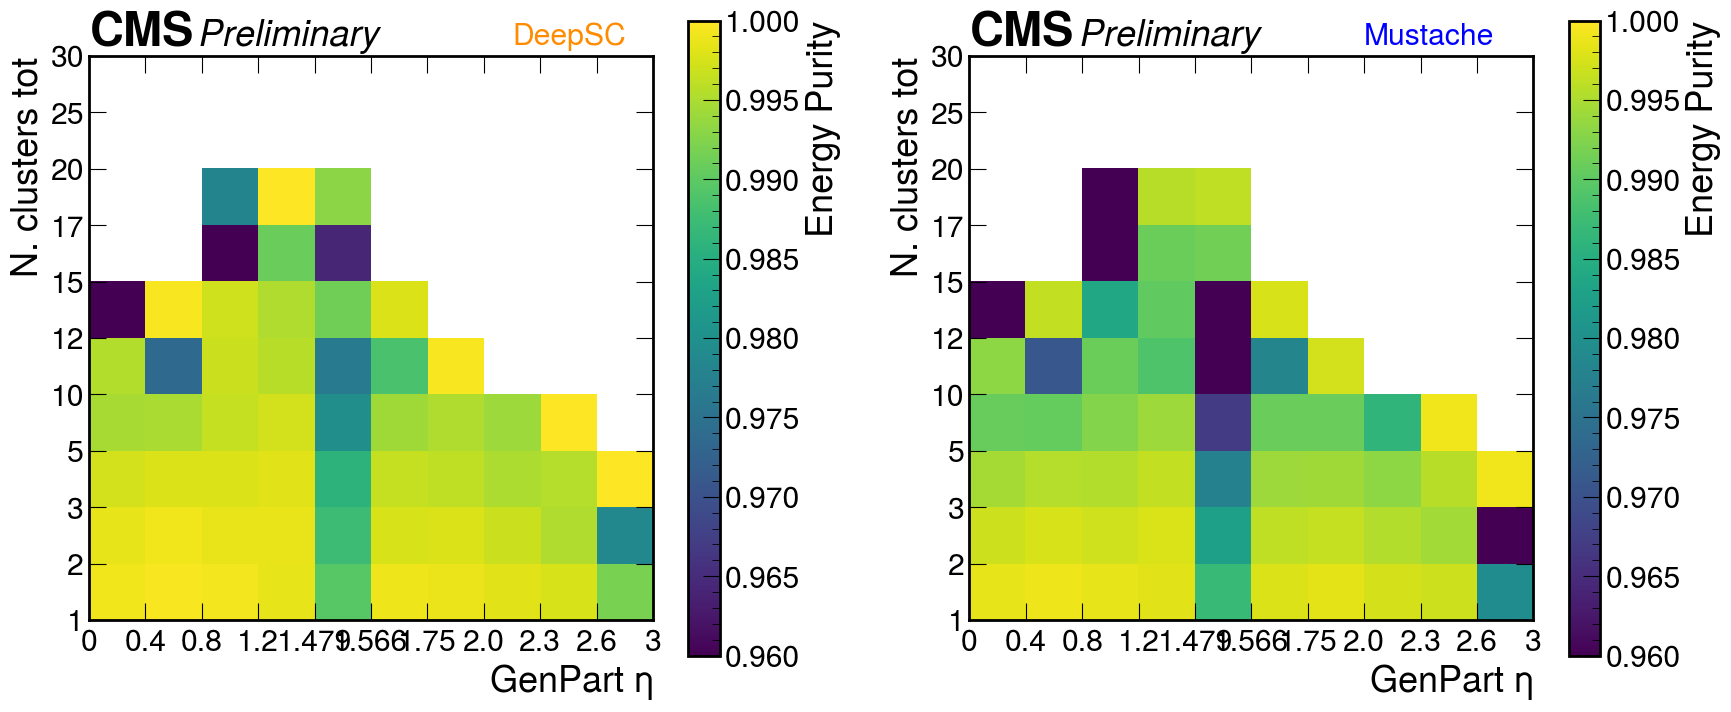

In [41]:
res_dsc =  dfmatched_sc.groupby(["eta_bin_D", "ncls_bin_D"])\
                 .apply( lambda gr:  (gr.sel_true_energy_cls_D / gr.selected_energy_cls_D).mean())

new_index = pd.MultiIndex.from_product(res_dsc.index.levels)
res_dsc = res_dsc.reindex(new_index)
res_dsc.fillna(0).astype(float)

res_mst =  dfmatched_sc.groupby(["eta_bin_M", "ncls_bin_M"])\
                 .apply( lambda gr:  (gr.sel_true_energy_cls_M/ gr.selected_energy_cls_M).mean())

new_index = pd.MultiIndex.from_product(res_mst.index.levels)
res_mst = res_mst.reindex(new_index)
res_mst.fillna(0).astype(float)

vmin=0.96

fig, (ax, ab) = plt.subplots(1,2, figsize=(18,8),dpi=100)
plt.subplots_adjust( wspace=0.3)

a1 = res_dsc.values.reshape((len(etas)-1,len(ncls)-1))
a1[a1==0] = np.nan
a2 = res_mst.values.reshape((len(etas)-1,len(ncls)-1))
a2[a2==0] = np.nan

A = ax.imshow(a1.T, vmin=vmin, vmax=1)
ax.set_xlabel("GenPart $\eta$")
ax.set_ylabel("N. clusters tot")
fig.colorbar(A , label="Energy Purity", ax=ax, shrink=0.9)

ax.set_yticks(np.arange(len(ncls)) - 0.5, minor=False)
ax.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ax.set_yticklabels(ncls)
ax.set_xticklabels(etas)

B = ab.imshow(a2.T, vmin=vmin, vmax=1)
ab.set_xlabel("GenPart $\eta$")
ab.set_ylabel("N. clusters tot")
fig.colorbar(B , label="Energy Purity", ax=ab, shrink=0.9)


ab.set_yticks(np.arange(len(ncls)) - 0.5, minor=False)
ab.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ab.set_yticklabels(ncls)
ab.set_xticklabels(etas)

ax.text(0.75, 1.02, "DeepSC", transform=ax.transAxes, color='darkorange', fontsize="small", fontweight='roman')
ab.text(0.7, 1.02, "Mustache", transform=ab.transAxes, color='blue', fontsize="small", fontweight='roman')
# ax.text(0.7, 0.9,  flavour, transform=ax.transAxes, fontsize="small", )
# ab.text(0.7, 0.9, flavour, transform=ab.transAxes, fontsize="small")

ax.minorticks_off()
ab.minorticks_off()

hep.cms.text("Preliminary ",loc=0, ax=ax)
hep.cms.text("Preliminary ",loc=0, ax=ab)


plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_energy_purity.png")
plt.savefig(f"{output_folder}/Matched_energy_purity.pdf")

B: 2091644.0
A. 2091663.0


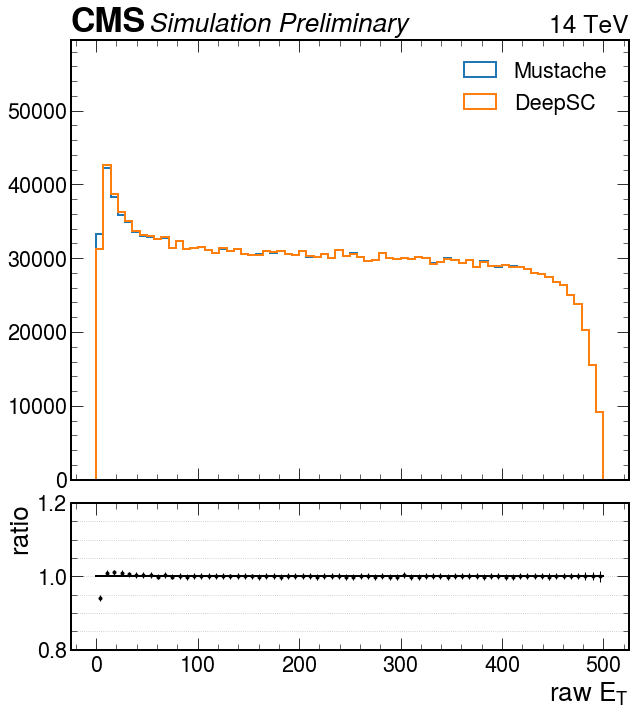

In [43]:
is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]
plot_comparison(dfmatched_sc.et_sc_raw_M, dfmatched_sc.et_sc_raw_D,
                var=f"SC_rawEt", label="raw $E_T$",
                output_folder=output_folder,
                bins=70, xrange=(0,500), ratio_lim=(0.8,1.2))

B: 2096113.0
A. 2096113.0


/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: divide by zero encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: invalid value encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:103: RuntimeWarning: divide by zero encountered in divide
  A/B,
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_compari

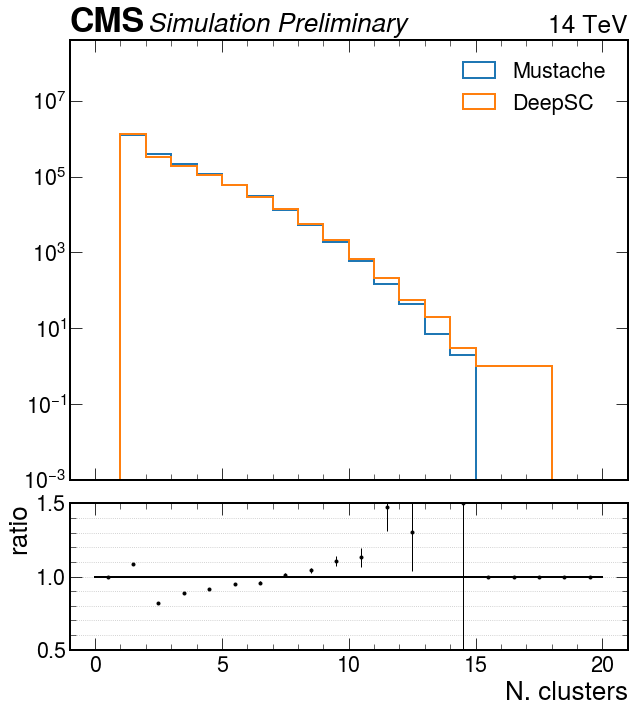

In [44]:
is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]
plot_comparison(dfmatched_sc.ncls_sel_M, dfmatched_sc.ncls_sel_D,
                var=f"SC_ncls_matched", label="N. clusters",
                output_folder=output_folder, ylog=True,
                bins=20, xrange=(0,20), ratio_lim=(0.5,1.5))

B: 852177.0
A. 742104.0


/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: divide by zero encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: invalid value encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:103: RuntimeWarning: divide by zero encountered in divide
  A/B,
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_compari

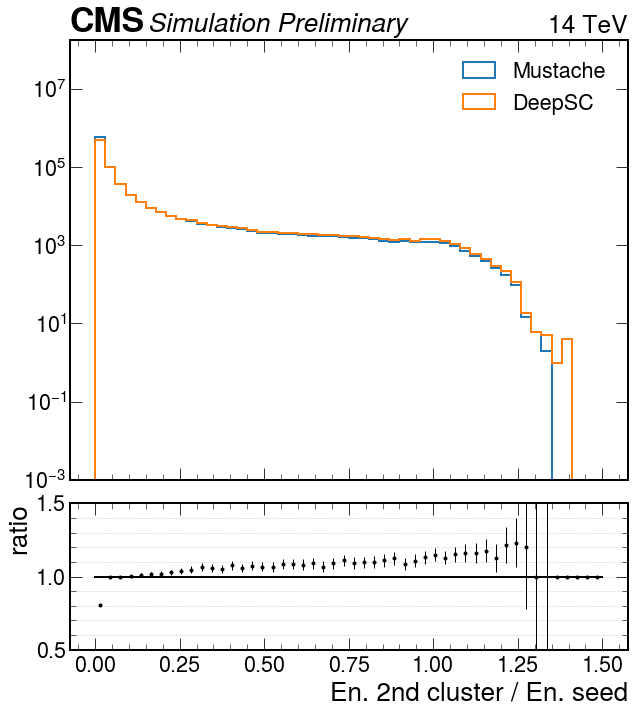

In [53]:
is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]
plot_comparison(dfmatched_sc.cl2_en_M/dfmatched_sc.en_seed_M, dfmatched_sc.cl2_en_D/dfmatched_sc.en_seed_D,
                var=f"SC_cl2_energy", label="En. 2nd cluster / En. seed",
                output_folder=output_folder, ylog=True,
                bins=50, xrange=(0,1.5), ratio_lim=(0.5,1.5))

B: 451740.0
A. 413153.0


/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: divide by zero encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: invalid value encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:103: RuntimeWarning: divide by zero encountered in divide
  A/B,
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_compari

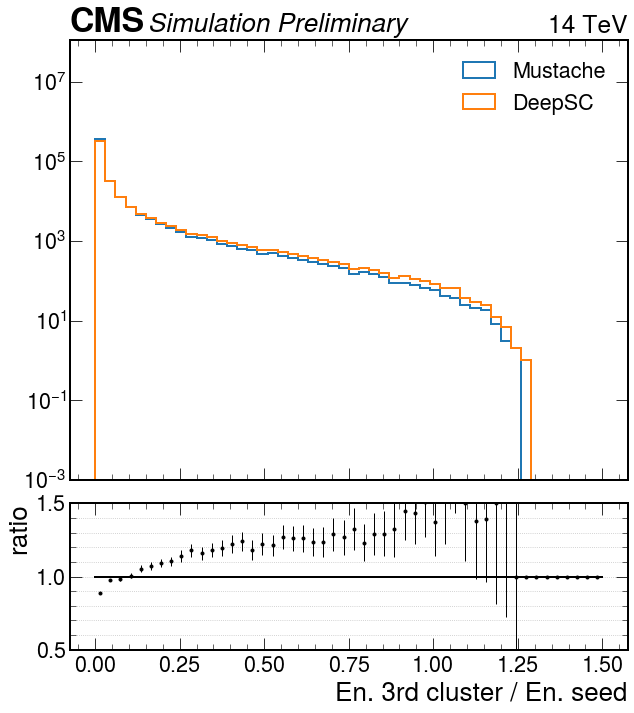

In [55]:
is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]
plot_comparison(dfmatched_sc.cl3_en_M/dfmatched_sc.en_seed_M, dfmatched_sc.cl3_en_D/dfmatched_sc.en_seed_D,
                var=f"SC_cl2_energy", label="En. 3rd cluster / En. seed",
                output_folder=output_folder, ylog=True,
                bins=50, xrange=(0,1.5), ratio_lim=(0.5,1.5))

B: 2096113.0
A. 2096113.0


/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: divide by zero encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: invalid value encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:103: RuntimeWarning: divide by zero encountered in divide
  A/B,
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_compari

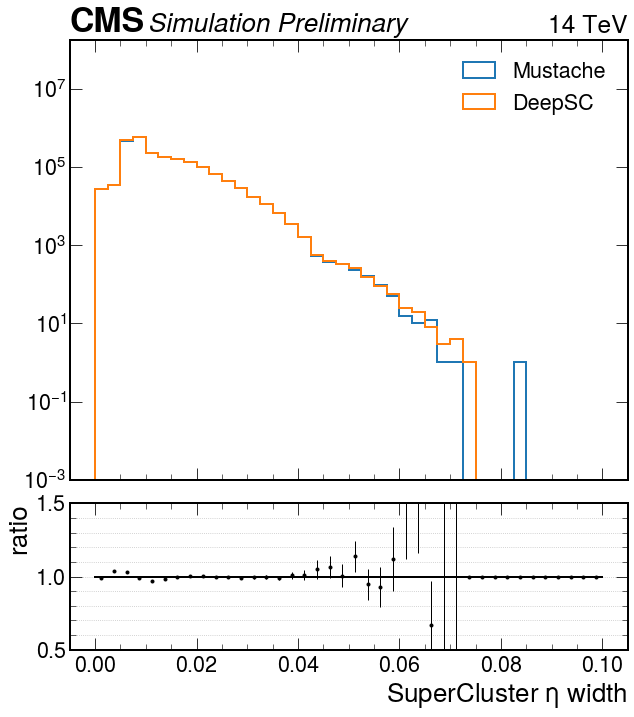

In [56]:
is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]
plot_comparison(dfmatched_sc.sc_etaWidth_M, dfmatched_sc.sc_etaWidth_D,
                var=f"SC_eta_width", label="SuperCluster $\eta$ width",
                output_folder=output_folder, ylog=True,
                bins=40, xrange=(0,0.1), ratio_lim=(0.5,1.5))

B: 2096108.0
A. 2096111.0


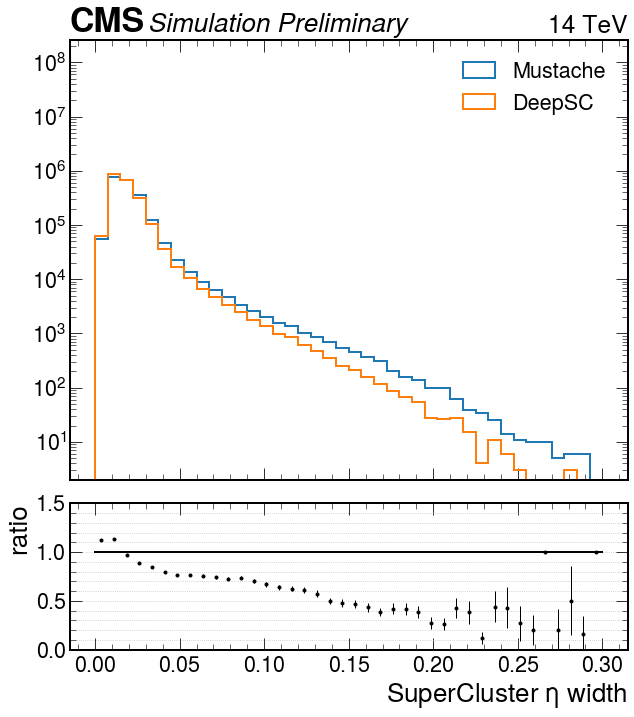

In [58]:
is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]
plot_comparison(dfmatched_sc.sc_phiWidth_M, dfmatched_sc.sc_phiWidth_D,
                var=f"SC_phi_width", label="SuperCluster $\eta$ width",
                output_folder=output_folder, ylog=True,
                bins=40, xrange=(0,0.3), ratio_lim=(0.,1.5))

B: 2096113.0
A. 2096113.0


/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: divide by zero encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: invalid value encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:103: RuntimeWarning: divide by zero encountered in divide
  A/B,
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_compari

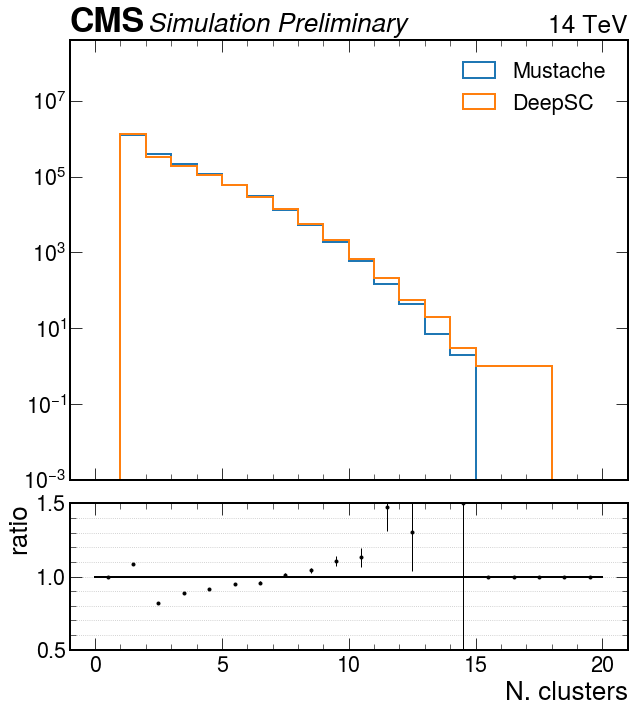

In [59]:
is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]
plot_comparison(dfmatched_sc.ncls_sel_M, dfmatched_sc.ncls_sel_D,
                var=f"SC_ncls_matched", label="N. clusters",
                output_folder=output_folder, ylog=True,
                bins=20, xrange=(0,20), ratio_lim=(0.5,1.5))

B: 2095941.0
A. 2096003.0


/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: divide by zero encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:103: RuntimeWarning: divide by zero encountered in divide
  A/B,


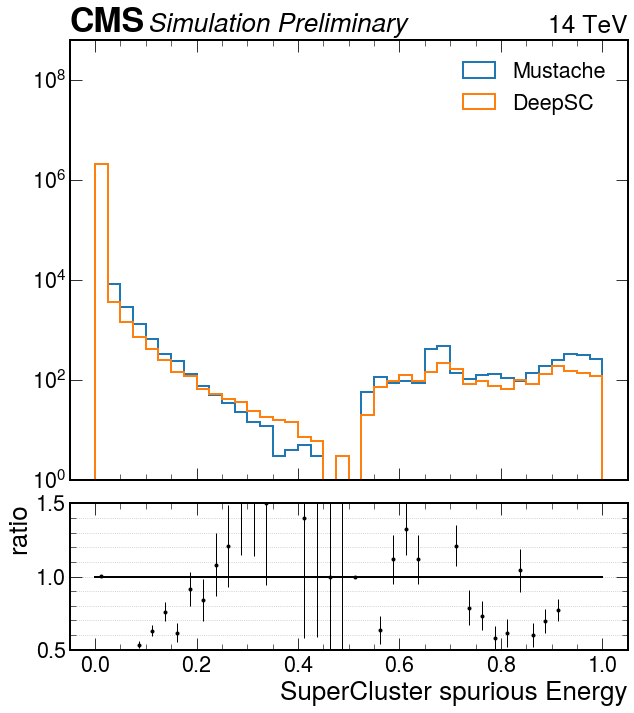

In [174]:
is_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[is_matched]
plot_comparison(dfmatched_sc.spurious_energy_M/dfmatched_sc.en_sc_calib_M, dfmatched_sca.spurious_energy_D/dfmatched_sc.en_sc_calib_D,
                var=f"SC_spurious_en", label="SuperCluster spurious Energy",
                output_folder=output_folder, ylog=True,
                bins=40, xrange=(0,1), ratio_lim=(0.5,1.5))

# patElectron matching

In [19]:
dfj.elematched_M

0          1.0
1          0.0
2          1.0
3          1.0
4          0.0
          ... 
2167499    0.0
2167500    1.0
2167501    0.0
2167502    1.0
2167503    1.0
Name: elematched_M, Length: 2167504, dtype: float64

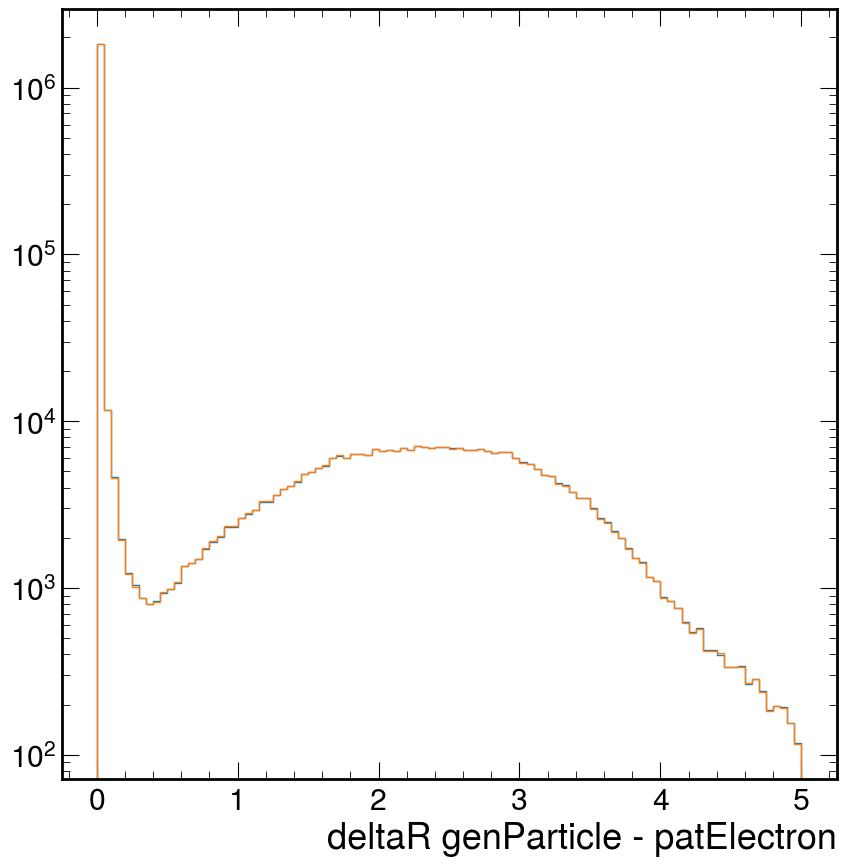

In [158]:
plt.hist(dfj.deltaR_genPart_ele_M, bins=100, range=(0, 5), histtype="step")
plt.hist(dfj.deltaR_genPart_ele_D, bins=100, range=(0, 5), histtype="step")
plt.yscale("log")
plt.xlabel("deltaR genParticle - patElectron")
plt.savefig(f"{output_folder}/Matched_ele_DeltaR.png")
plt.savefig(f"{output_folder}/Matched_ele_DeltaR.pdf")

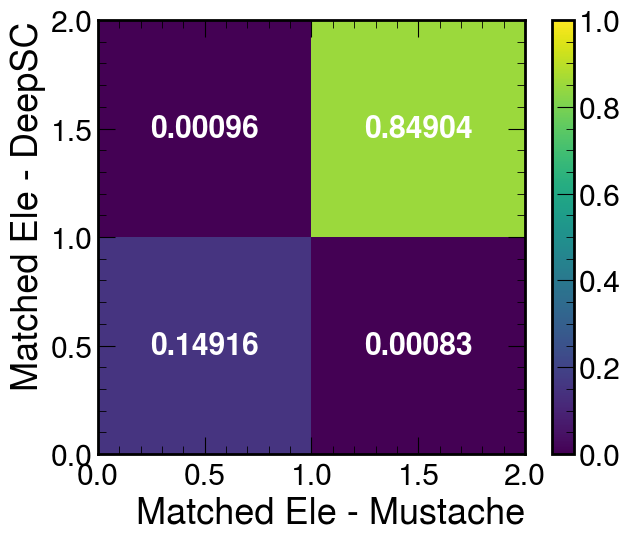

In [77]:
fig = plt.figure(figsize=(7,6))
ax = plt.gca()

hist, xbins, ybins = np.histogram2d(dfj.deltaR_genPart_ele_M<0.4, 
                                    dfj.deltaR_genPart_ele_D<0.4,
                                     range=((0,2),(0,2)), bins=(2,2), density=True)

X, Y = np.meshgrid(xbins, ybins)
C = ax.pcolormesh(X,Y, hist.T, vmax=1, vmin=0)

for i in range(2):
    for j in range(2):
        ax.text(xbins[j]+0.5,ybins[i]+0.5, "{:.5f}".format(hist.T[i,j]), 
                color="w", ha="center", va="center", fontweight="bold", fontsize="small")

fig.colorbar(C,ax=ax)
ax.set_xlabel("Matched Ele - Mustache")
ax.set_ylabel("Matched Ele - DeepSC")
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_ele_inclusive.png")
plt.savefig(f"{output_folder}/Matched_genparticle_ele_inclusive.pdf")

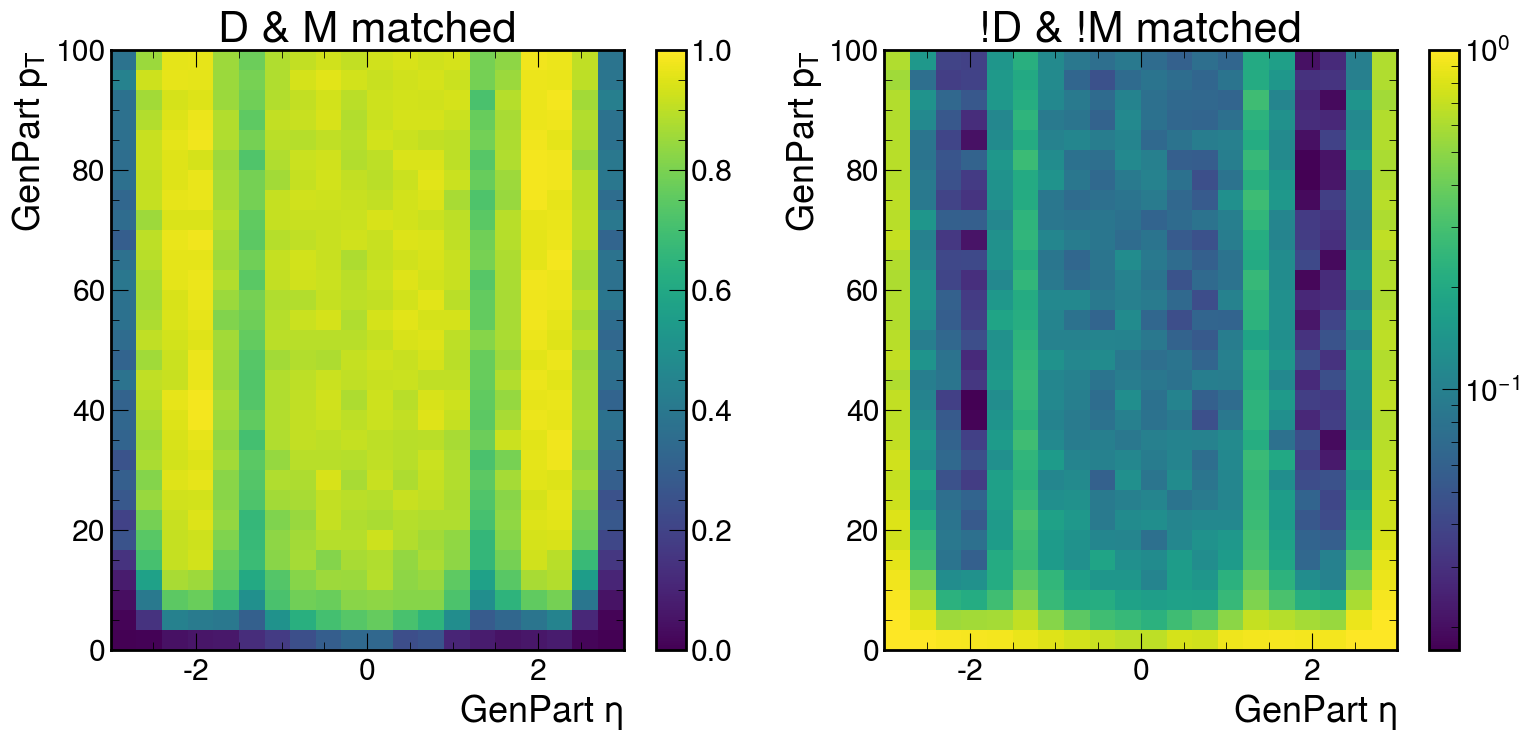

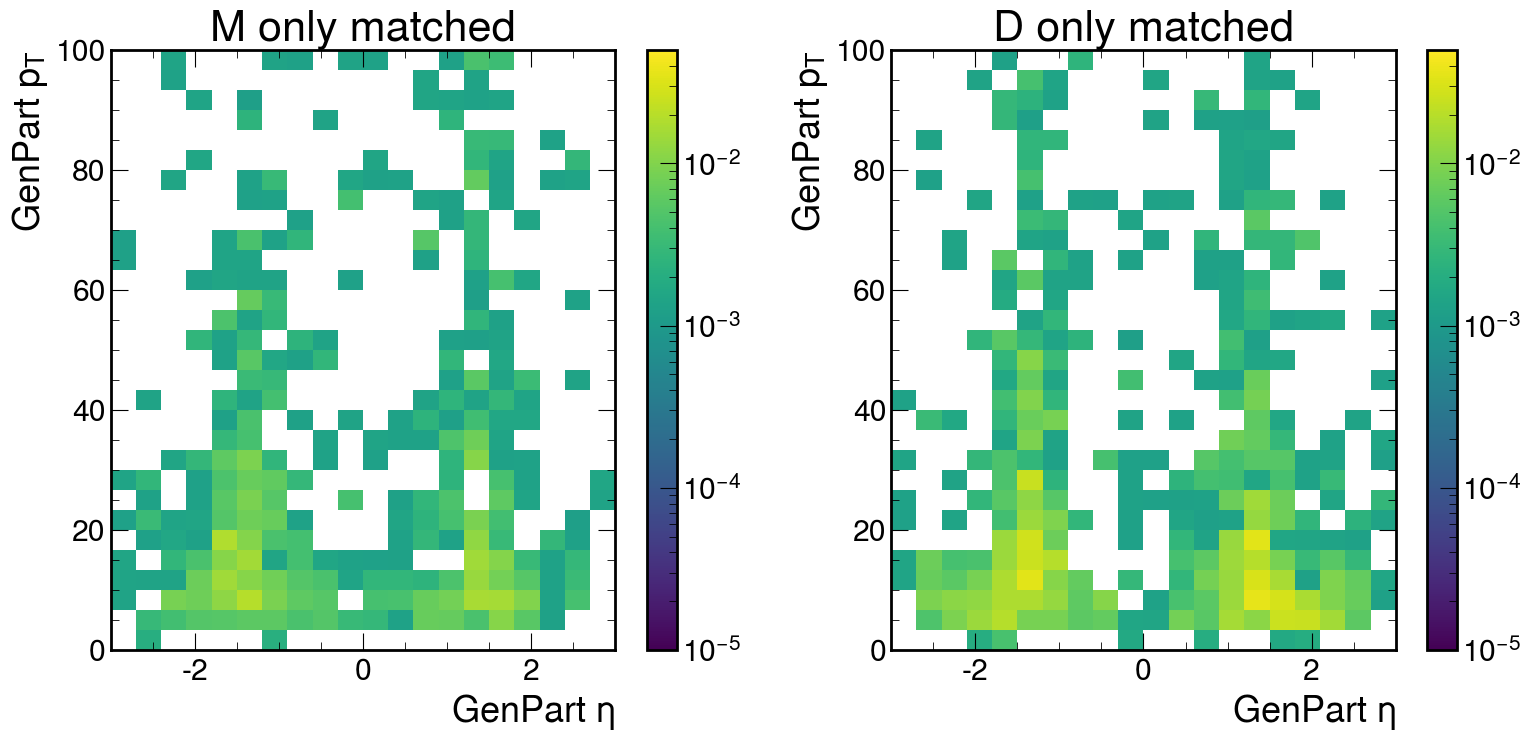

In [179]:
bins = (20, 30)
rrange = ((-3,3),(0,100))
df_join = dfj

dfj.elematched_D = dfj.deltaR_genPart_ele_D<0.2
dfj.elematched_M = dfj.deltaR_genPart_ele_M<0.2

N_matched_both_pteta, _, _ = np.histogram2d(dfj["genpart_eta_D"][(dfj.elematched_D==1)&(dfj.elematched_M==1)],
                                            dfj["genpart_pt_D"][(dfj.elematched_D==1)&(dfj.elematched_M==1)],
               bins=bins, range=rrange )

N_matched_Donly_pteta, _, _ = np.histogram2d(dfj["genpart_eta_D"][(df_join.elematched_D==1)&(df_join.elematched_M==0)],
                                             dfj["genpart_pt_D"][(df_join.elematched_D==1)&(df_join.elematched_M==0)],
            bins=bins, range=rrange  )

N_matched_Monly_pteta, _, _= np.histogram2d(df_join["genpart_eta_M"][(df_join.elematched_D==0)&(df_join.elematched_M==1)], 
                                            df_join["genpart_pt_M"][(df_join.elematched_D==0)&(df_join.elematched_M==1)], 
            bins=bins, range=rrange )

N_notmatched_pteta, xbins, ybins = np.histogram2d(df_join["genpart_eta_M"][(df_join.elematched_D==0)&(df_join.elematched_M==0)], 
                                                  df_join["genpart_pt_M"][(df_join.elematched_D==0)&(df_join.elematched_M==0)], 
             bins=bins, range=rrange )

N_tot = N_matched_both_pteta + N_matched_Donly_pteta + N_matched_Monly_pteta + N_notmatched_pteta

X, Y = np.meshgrid(xbins, ybins)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,8))

c1 = ax1.pcolormesh(X,Y, (N_matched_both_pteta/N_tot).T, vmax=1, vmin=0)
c2 = ax2.pcolormesh(X,Y, (N_notmatched_pteta/N_tot).T,  norm=LogNorm())

ax1.set_xlabel("GenPart $\eta$")
ax2.set_xlabel("GenPart $\eta$")
ax1.set_ylabel("GenPart $p_T$")
ax2.set_ylabel("GenPart $p_T$")
ax1.set_title("D & M matched")
ax2.set_title("!D & !M matched")
plt.colorbar(c1, ax=ax1)
plt.colorbar(c2, ax=ax2)
plt.tight_layout()

plt.savefig(f"{output_folder}/Matched_genparticle_ele_etapt_1.png")
plt.savefig(f"{output_folder}/Matched_genparticle_ele_etapt_1.pdf")

fig2, (ax3,ax4) = plt.subplots(1,2, figsize=(16,8))
c3 = ax3.pcolormesh(X,Y, (N_matched_Monly_pteta/N_tot).T,  norm=LogNorm(vmax=0.05, vmin=1e-5,))
c4 = ax4.pcolormesh(X,Y, (N_matched_Donly_pteta/N_tot).T, norm=LogNorm( vmax=0.05, vmin=1e-5,))

ax3.set_xlabel("GenPart $\eta$")
ax4.set_xlabel("GenPart $\eta$")

ax3.set_ylabel("GenPart $p_T$")
ax4.set_ylabel("GenPart $p_T$")

ax3.set_title("M only matched")
ax4.set_title("D only matched")

plt.colorbar(c3, ax=ax3)
plt.colorbar(c4, ax=ax4)
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_ele_etapt_2.png")
plt.savefig(f"{output_folder}/Matched_genparticle_ele_etapt_2.pdf")

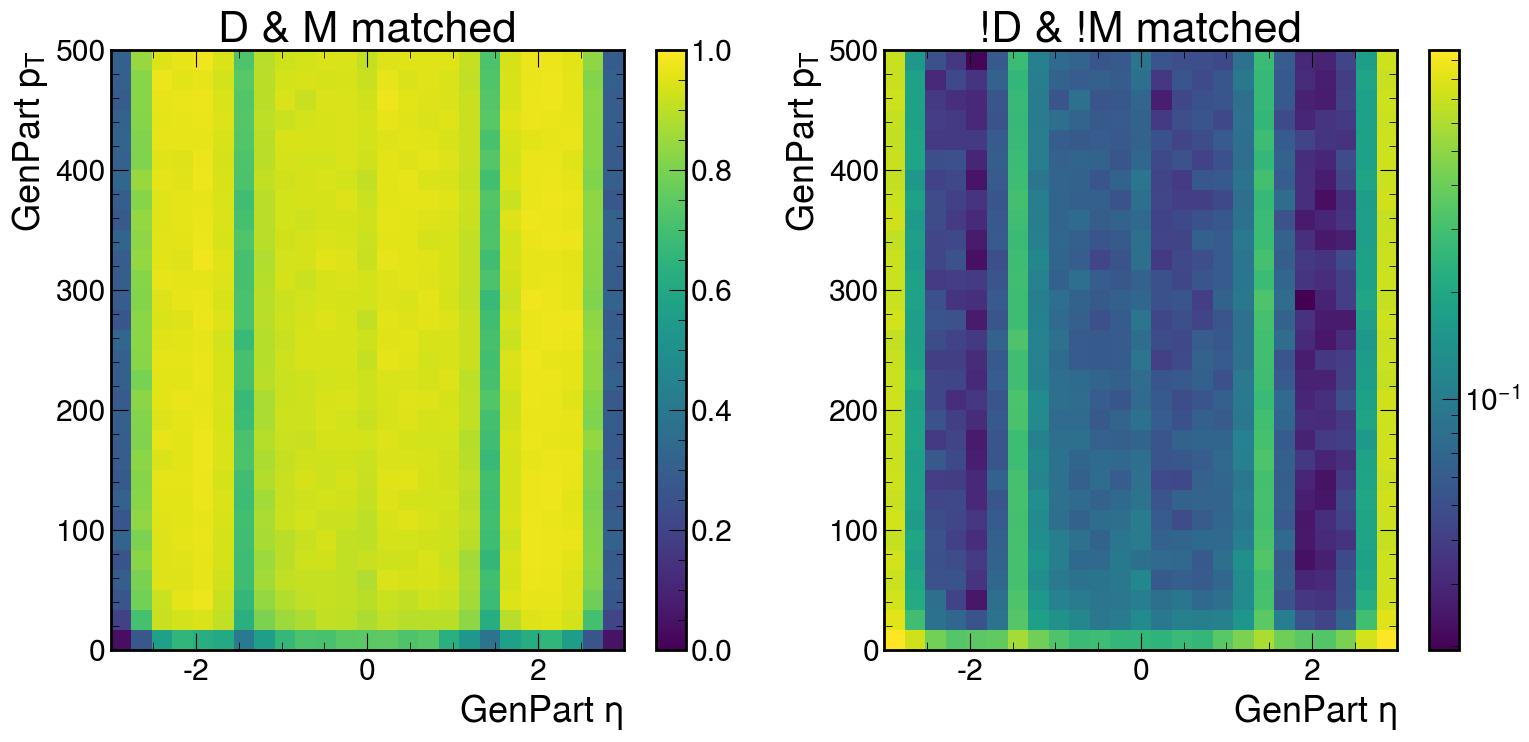

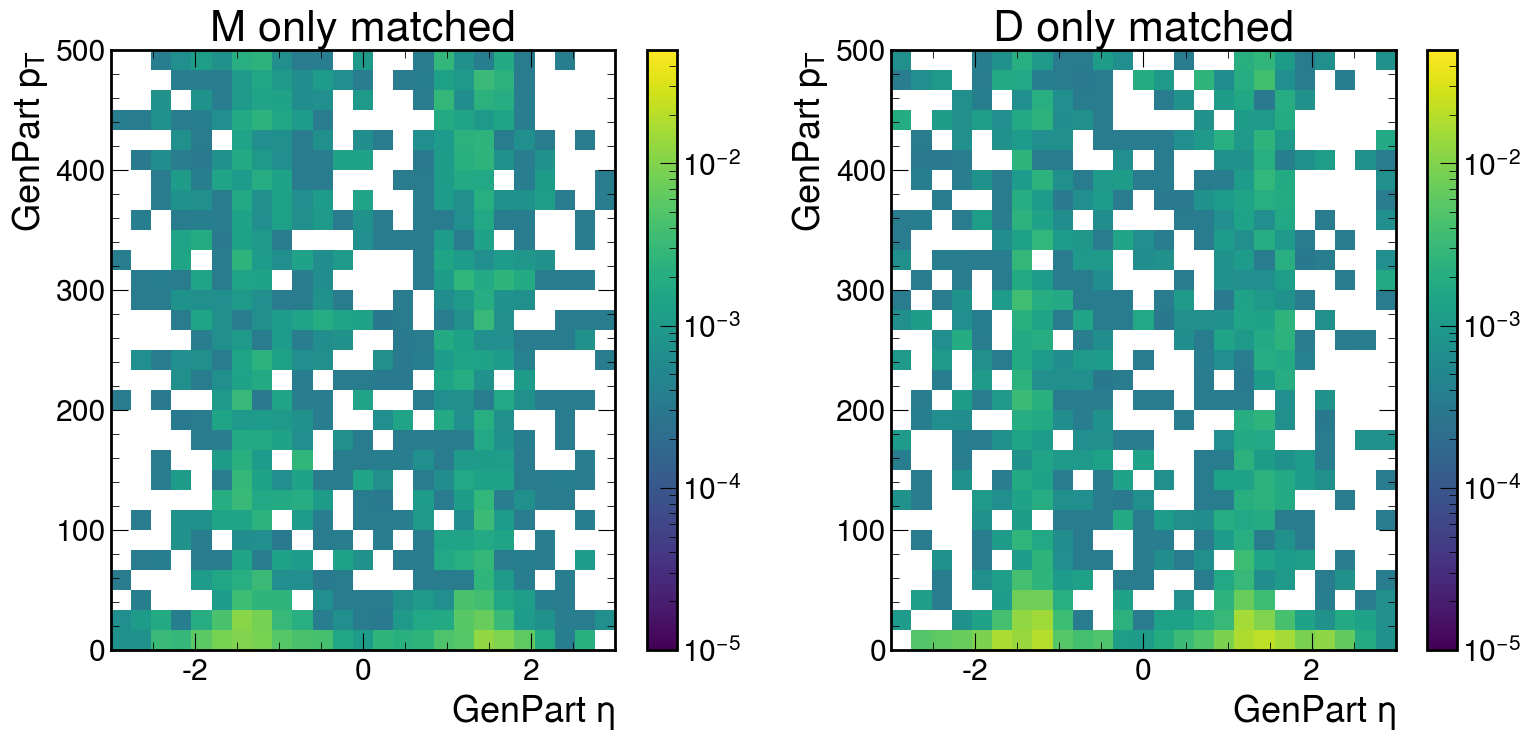

In [180]:
bins = (25, 30)
rrange = ((-3,3),(0,500))

dfj.elematched_D = dfj.deltaR_genPart_ele_D<0.2
dfj.elematched_M = dfj.deltaR_genPart_ele_M<0.2

N_matched_both_pteta, _, _ = np.histogram2d(dfj["genpart_eta_D"][(dfj.elematched_D==1)&(dfj.elematched_M==1)],
                                            dfj["genpart_pt_D"][(dfj.elematched_D==1)&(dfj.elematched_M==1)],
               bins=bins, range=rrange )

N_matched_Donly_pteta, _, _ = np.histogram2d(dfj["genpart_eta_D"][(df_join.elematched_D==1)&(df_join.elematched_M==0)],
                                             dfj["genpart_pt_D"][(df_join.elematched_D==1)&(df_join.elematched_M==0)],
            bins=bins, range=rrange  )

N_matched_Monly_pteta, _, _= np.histogram2d(df_join["genpart_eta_M"][(df_join.elematched_D==0)&(df_join.elematched_M==1)], 
                                            df_join["genpart_pt_M"][(df_join.elematched_D==0)&(df_join.elematched_M==1)], 
            bins=bins, range=rrange )

N_notmatched_pteta, xbins, ybins = np.histogram2d(df_join["genpart_eta_M"][(df_join.elematched_D==0)&(df_join.elematched_M==0)], 
                                                  df_join["genpart_pt_M"][(df_join.elematched_D==0)&(df_join.elematched_M==0)], 
             bins=bins, range=rrange )


N_tot = N_matched_both_pteta + N_matched_Donly_pteta + N_matched_Monly_pteta + N_notmatched_pteta

X, Y = np.meshgrid(xbins, ybins)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,8))

c1 = ax1.pcolormesh(X,Y, (N_matched_both_pteta/N_tot).T, vmax=1, vmin=0)
c2 = ax2.pcolormesh(X,Y, (N_notmatched_pteta/N_tot).T,  norm=LogNorm())

ax1.set_xlabel("GenPart $\eta$")
ax2.set_xlabel("GenPart $\eta$")
ax1.set_ylabel("GenPart $p_T$")
ax2.set_ylabel("GenPart $p_T$")
ax1.set_title("D & M matched")
ax2.set_title("!D & !M matched")
plt.colorbar(c1, ax=ax1)
plt.colorbar(c2, ax=ax2)
plt.tight_layout()

plt.savefig(f"{output_folder}/Matched_genparticle_ele_etapt_1.png")
plt.savefig(f"{output_folder}/Matched_genparticle_ele_etapt_1.pdf")

fig2, (ax3,ax4) = plt.subplots(1,2, figsize=(16,8))
c3 = ax3.pcolormesh(X,Y, (N_matched_Monly_pteta/N_tot).T,  norm=LogNorm(vmax=0.05, vmin=1e-5,))
c4 = ax4.pcolormesh(X,Y, (N_matched_Donly_pteta/N_tot).T, norm=LogNorm( vmax=0.05, vmin=1e-5,))

ax3.set_xlabel("GenPart $\eta$")
ax4.set_xlabel("GenPart $\eta$")

ax3.set_ylabel("GenPart $p_T$")
ax4.set_ylabel("GenPart $p_T$")

ax3.set_title("M only matched")
ax4.set_title("D only matched")

plt.colorbar(c3, ax=ax3)
plt.colorbar(c4, ax=ax4)
plt.tight_layout()
plt.savefig(f"{output_folder}/Matched_genparticle_ele_etapt_2.png")
plt.savefig(f"{output_folder}/Matched_genparticle_ele_etapt_2.pdf")